In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.formula.api as sm
from tqdm import tqdm; tqdm.pandas();
from src.dag import grn
import pickle
import os
import scipy
import scipy.stats as ss
import itertools
import warnings

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
plt.rc('text', usetex = True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

SMALLER_SIZE = 7
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
warnings.filterwarnings('ignore')


%matplotlib inline

# Simulations

In [2]:
grn_file = 'figdata/ppm.graphs.parquet2'
grn_stub = os.path.join(os.path.dirname(grn_file),
                        'graphs',
                        os.path.splitext(os.path.basename(grn_file))[0])
grns = pd.read_parquet(grn_file).query('~hier')

n_sims = grns.shape[0]
n_genes = grns['n'].iloc[0]

grns['Median '+r'$V_{cis}/V_{G}$'] = grns['Median '+r'$V_{cis}/V_{tot}$']
grns[r'$V_{cis}/V_{G}$'] = grns[r'$V_{cis}/V_{tot}$']
grns['Avg. degree'] = grns['in_degrees'].apply(np.sum) / grns['n']
grns['Pct. edges in group'] = grns['in_group_edges'] / grns['in_degrees'].apply(np.sum)

grns['y'] = grns['Median '+r'$V_{cis}/V_{G}$']
grns['I(1 / (1 + (r * (gamma ** 2))))'] = 1 / (1 + (grns['r'] * (grns['gamma'] ** 2)))

display(grns.head()); display(grns.shape)

model     n         r   k     gamma      p_up   hier           w         m  \
0   ppm  5000  8.030511  49  0.338896  0.587104  False    2.786256  0.054862   
1   ppm  5000  9.797471  98  0.367830  0.110356  False  142.893844  0.595654   
2   ppm  5000  5.492590  59  0.321529  0.523163  False  124.543907  0.682268   
3   ppm  5000  9.556585  91  0.473481  0.749430  False    1.000000  0.010989   
4   ppm  5000  2.668235  80  0.434825  0.420228  False  530.938440  0.870479   

                                   $V_{cis}/V_{tot}$  ...  \
0  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  ...   
1  [1.0, 1.0, 1.0, 0.8808255243858331, 1.0, 1.0, ...  ...   
2  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  ...   
3  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  ...   
4  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  ...   

  Median $V_{cis}/V_{tot}$                                         in_degrees  \
0                 0.412675  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
1                 0.317622  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2                 0.586057  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3                 0.127043  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...   
4                 0.648203  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...   

                                         out_degrees  in_group_edges  \
0  [9, 18, 11, 17, 19, 17, 21, 22, 22, 16, 18, 17...            2174   
1  [18, 18, 18, 15, 13, 17, 17, 24, 25, 17, 18, 2...           28372   
2  [17, 15, 10, 9, 5, 10, 13, 13, 9, 11, 11, 12, ...           18751   
3  [26, 21, 30, 20, 24, 16, 20, 22, 16, 21, 13, 1...             480   
4  [7, 5, 7, 5, 4, 5, 6, 3, 6, 8, 7, 2, 4, 5, 10,...           11543   

  Median $V_{cis}/V_{G}$                                    $V_{cis}/V_{G}$  \
0               0.412675  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
1               0.317622  [1.0, 1.0, 1.0, 0.8808255243858331, 1.0, 1.0, ...   
2               0.586057  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
3               0.127043  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
4               0.648203  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   

   Avg. degree  Pct. edges in group         y  I(1 / (1 + (r * (gamma ** 2))))  
0       8.0256             0.054177  0.412675                         0.520208  
1       9.6414             0.588545  0.317622                         0.429999  
2       5.4942             0.682574  0.586057                         0.637825  
3       9.5672             0.010034  0.127043                         0.318224  
4       2.6484             0.871696  0.648203                         0.664676  

[5 rows x 23 columns]

(10000, 23)

# Parameter effects

## Graph properties

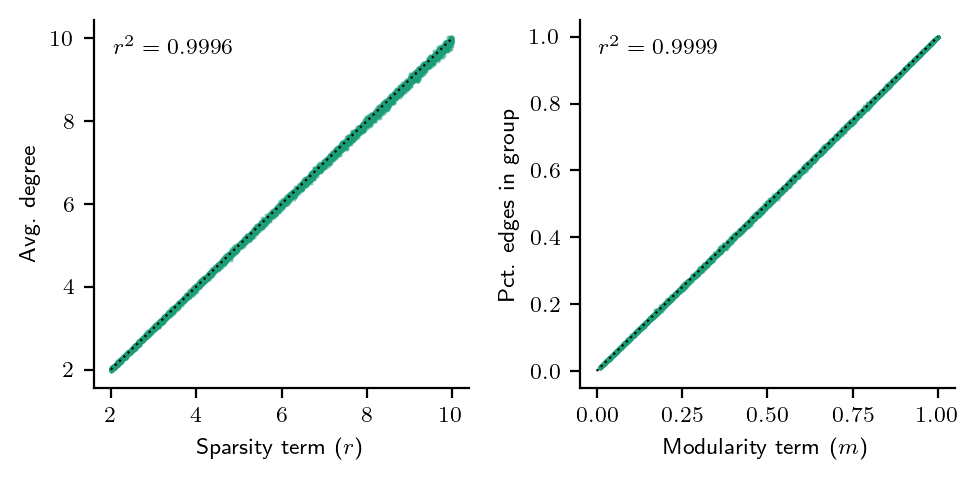

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.5), dpi=200)

ax = axs[0]
grns.plot.scatter(
    x = 'r',
    y = 'Avg. degree',
    s = 0.8,
    alpha = 0.5,
    marker = '.',
    ax = ax
)
ax.set_xlabel('Sparsity term ({})'.format(r'$r$'));
ax.plot([2,10], [2,10], 'k:', linewidth=0.8);
ax.text(
    0.05, 
    0.95, 
    '$r^2={:.4f}$'.format(grns[['r','Avg. degree']].corr().iloc[0,1]**2), 
    transform=ax.transAxes, 
    ha='left', 
    va='top',
    fontsize=8
);


ax = axs[1]
grns.plot.scatter(
    x = 'm',
    y = 'Pct. edges in group',
    s = 0.8,
    alpha = 0.5,
    marker = '.',
    ax = ax
)
ax.set_xlabel('Modularity term ({})'.format(r'$m$'));
ax.plot([0,1], [0,1], 'k:', linewidth=0.8);
ax.text(
    0.05, 
    0.95, 
    '$r^2={:.4f}$'.format(grns[['m','Pct. edges in group']].corr().iloc[0,1]**2), 
    transform=ax.transAxes, 
    ha='left', 
    va='top',
    fontsize=8
);

fig.tight_layout();
sns.despine();
plt.savefig('png/supplement/Fig_S3A.png');

## Motif counts

### Theoretical result

For the Erdos-Renyi graph, $\mathbb{E}[\text{# of triangles}] = {n \choose 3} p^3 = \frac{4 n(n-2) r^3}{3 (n-1)^2} \approx \frac{4}{3} r^3$, since here $p = 2r / (n-1)$. 

For the planted partition model, we can extend this to 

$ \mathbb{E}[\text{# of triangles}] = k {n/k \choose 3} p^3 + k (k - 1) {n/k \choose 2} (n/k) p q^2 + {k \choose 3} (n/k)^3 q^3$

where $p = \frac{2 k r m}{n-1}$ and $q = \frac{2 k r (1-m)}{(k-1)(n-1)}$. Plugging in, 

$ \mathbb{E}[\text{# of triangles}] = \frac{k}{6} \frac{n}{k} \frac{n-k}{k} \frac{n-2k}{k} \left(\frac{2krm}{n-1}\right)^3 + \frac{k (k - 1)}{2} \frac{n}{k} \frac{n-k}{k} \frac{n}{k} \frac{2krm}{n-1} \left( \frac{2 k r (1-m)}{(k-1)(n-1)} \right)^2 + \frac{k}{6} (k-1)(k-2) (n/k)^3 \left( \frac{2 k r (1-m)}{(k-1)(n-1)} \right)^3 $

and simplifying each term,

$ \mathbb{E}[\text{# of triangles}] = \frac{4 k (r m)^3}{3} \frac{n(n-k)(n-2k)}{(n-1)^3} + \frac{4 k r^3 m (1-m)^2 n^2 (n-k)}{(n-1)^3 (k-1)} + \frac{4 n^3 k (k-2) r^3 (1-m)^3}{3 (n-1)^3 (k-1)^2} $

then collecting,

$ \mathbb{E}[\text{# of triangles}] = \frac{4}{3} k n \left( \frac{r}{(n-1)} \right)^3 \left( m^3 (n-k)(n-2k) + 3 m (1-m)^2 n (n-k)\frac{1}{k-1} + (1-m)^3 n^2 \frac{k(k-2)}{(k-1)^2} \right)$

and pushing stuff back,

$ \mathbb{E}[\text{# of triangles}] = \frac{4}{3} r^3 \left(k m^3 \frac{n(n-k)(n-2k)}{(n-1)^3} + 3 m (1-m)^2 \frac{k}{k-1} \frac{n^2 (n-k)}{(n-1)^3} + (1-m)^3 \frac{k(k-2)}{(k-1)^2} \frac{n^3}{(n-1)^3} \right)$

which in the limit $1 \ll k \ll n$,

$ \mathbb{E}[\text{# of triangles}] = \frac{4}{3} r^3 \left(k m^3 + 3 m (1-m)^2 + (1-m)^3 \right)$

or simply,

$ \mathbb{E}[\text{# of triangles}] = \frac{4}{3} r^3 \left(1 - 3 m^2 (1-m) + (k-1) m^3 \right)$

### Simulated result

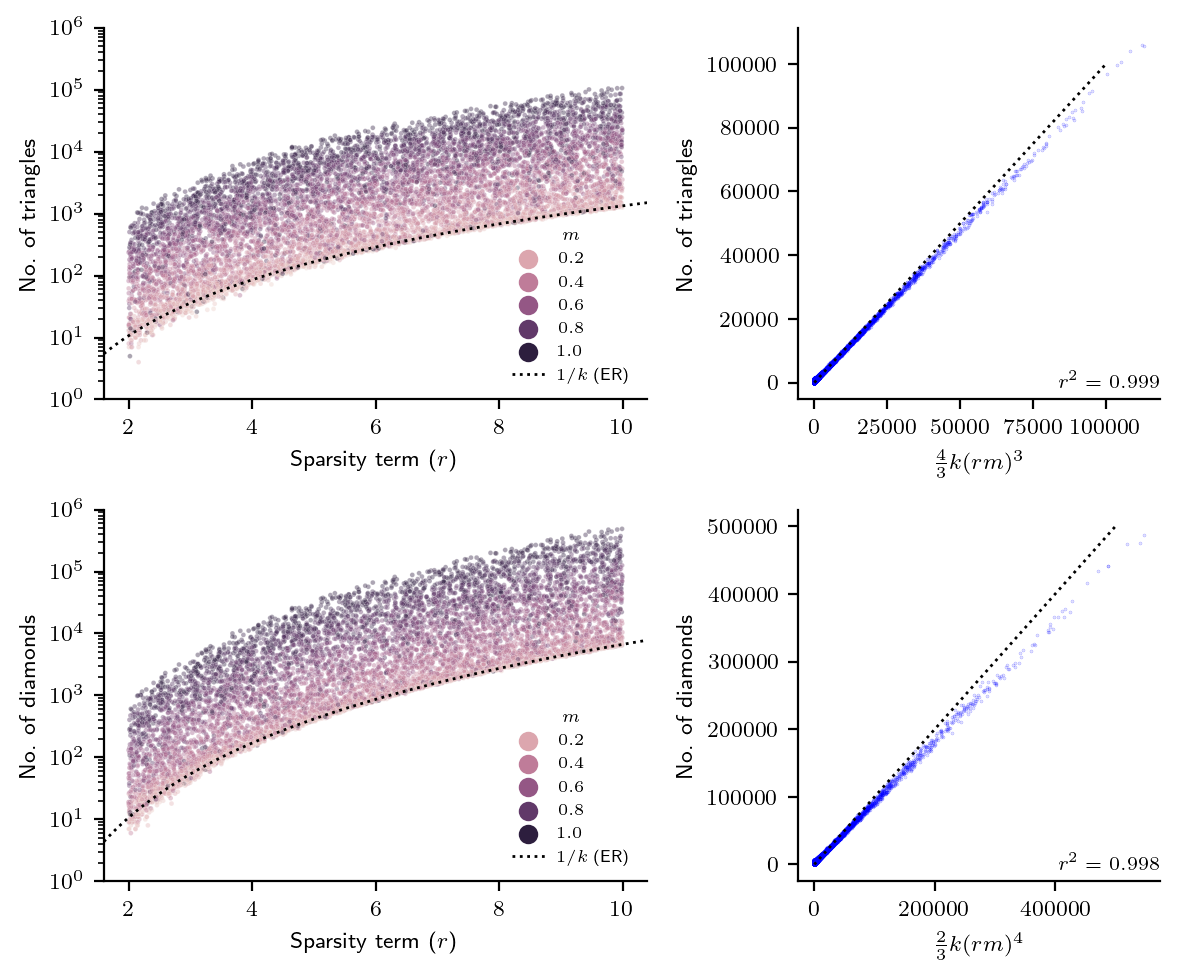

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(6, 5), width_ratios=[0.6, 0.4], dpi=200)

# triangles
ax = axs[0,0]
sns.scatterplot(
    x = 'r', 
    y = 'triangles', 
    hue = 'm', 
    alpha = 0.4, 
    s = 3, 
    data = grns, 
    ax = ax
);
ax.set_xlabel('Sparsity term ({})'.format(r'$r$'));
ax.set_ylabel('No. of triangles');
ax.set_yscale('log');
xl = ax.get_xlim()
xx = np.linspace(*xl, n_sims);
ax.plot(
    xx, 
    scipy.special.comb(grns.n, 3) * (2 * xx / (grns.n - 1)) ** 3, 
    'k:', 
    linewidth=1, 
    label=r'$1/k \text{ (ER)}$'
);
ax.set_xlim(xl);
ax.legend(
    frameon=False, 
    title=r'$m$', 
    fontsize = 6, 
    title_fontsize = 6,
    loc = 'lower right'
);
yl = [1e0, 1e6]
ax.set_ylim(yl);


# triangle math
ax = axs[0,1]
ax.plot(
    np.maximum(1,(4/3) * (grns['k']) * (grns['r'] * grns['m']) ** 3),
    grns['triangles'],
    'b.',
    ms=0.5,
    alpha=0.3
);
ax.plot([1,1e5],[1,1e5], 'k:', linewidth=1);
ax.set_xlabel(r'$\textstyle\frac{4}{3} k (rm)^3$');
ax.set_ylabel('No. of triangles');
ax.text(
    1.0,
    0.02,
    r'$r^2={:.3f}$'.format(ss.pearsonr((grns['k']) * (grns['r'] * grns['m']) ** 3, grns['triangles'])[0]**2),
    ha = 'right',
    va = 'bottom',
    fontsize = 7,
    transform = ax.transAxes
);
#ax.loglog();

# diamonds
ax = axs[1,0]
sns.scatterplot(
    x = 'r', 
    y = 'diamonds', 
    hue = 'm', 
    alpha = 0.4, 
    s = 3, 
    data = grns, 
    ax = ax
);
ax.set_xlabel('Sparsity term ({})'.format(r'$r$'));
ax.set_ylabel('No. of diamonds');
ax.set_yscale('log');
xl = ax.get_xlim()
xx = np.linspace(*xl, n_sims);
ax.plot(
    xx, 
    scipy.special.comb(grns.n, 4) * (2 * xx / (grns.n - 1)) ** 4, 
    'k:', 
    linewidth=1, 
    label=r'$1/k \text{ (ER)}$'
);
ax.set_xlim(xl);
ax.legend(
    frameon = False, 
    title = r'$m$', 
    fontsize = 6, 
    title_fontsize = 6
);
yl = [1e0, 1e6]
ax.set_ylim(yl);


# diamond math
ax = axs[1,1]
ax.plot(
    np.maximum(1, (2/3) * (grns['k']) * (grns['r'] * grns['m']) ** 4),
    grns['diamonds'],
    'b.',
    ms=0.5,
    alpha=0.3
);
ax.plot([1,5e5],[1,5e5], 'k:', linewidth=1);
ax.set_xlabel(r'$\textstyle\frac{2}{3} k (rm)^4$');
ax.set_ylabel('No. of diamonds');
ax.text(
    1.0,
    0.02,
    r'$r^2={:.3f}$'.format(ss.pearsonr((grns['k']) * (grns['r'] * grns['m']) ** 4, grns['diamonds'])[0]**2),
    ha = 'right',
    va = 'bottom',
    fontsize = 7,
    transform = ax.transAxes
);
#ax.loglog();

fig.tight_layout();
sns.despine();

plt.savefig('png/supplement/Fig_S3C.png');

### Leading term

In [5]:
print(sm.ols('diamonds ~ I(k*(r*m)**4) + 0', data = grns).fit().summary())
print(sm.ols('triangles ~ I((r**3)*(I(m**3 * k))) + 0', data = grns).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:               diamonds   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          3.757e+06
Date:                Sat, 02 Aug 2025   Prob (F-statistic):                        0.00
Time:                        13:55:21   Log-Likelihood:                         -91356.
No. Observations:               10000   AIC:                                  1.827e+05
Df Residuals:                    9999   BIC:                                  1.827e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## Heritability distribution

### Regression analysis

In [6]:
model0 = sm.ols('y ~ 1 + I(1/(1 + (r*(gamma**2))))', data = grns).fit()
model1 = sm.ols('y ~ 1 + I(1/(1 + (r*(gamma**2)))) + I(triangles * (p_up - 0.5)) + I(diamonds * ((p_up - 0.5)**2))', data = grns).fit()
print(model0.summary())
print(model1.summary())
grns['resid0'] = model0.resid
grns['resid1'] = model1.resid
grns[r'$m(2p^+ - 1)$'] = grns['m'] * ((2 * grns['p_up']) - 1)
grns[r'$k(2p^+ - 1)$'] = grns['k'] * ((2 * grns['p_up']) - 1)
print(sm.ols('y ~ 1 + r + gamma + p_up + k + m', data = grns).fit().summary())
print(sm.ols('resid1 ~ 1 + r + gamma + p_up + k + m', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 6.541e+05
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:55:21   Log-Likelihood:                 22328.
No. Observations:               10000   AIC:                        -4.465e+04
Df Residuals:                    9998   BIC:                        -4.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

### Plot

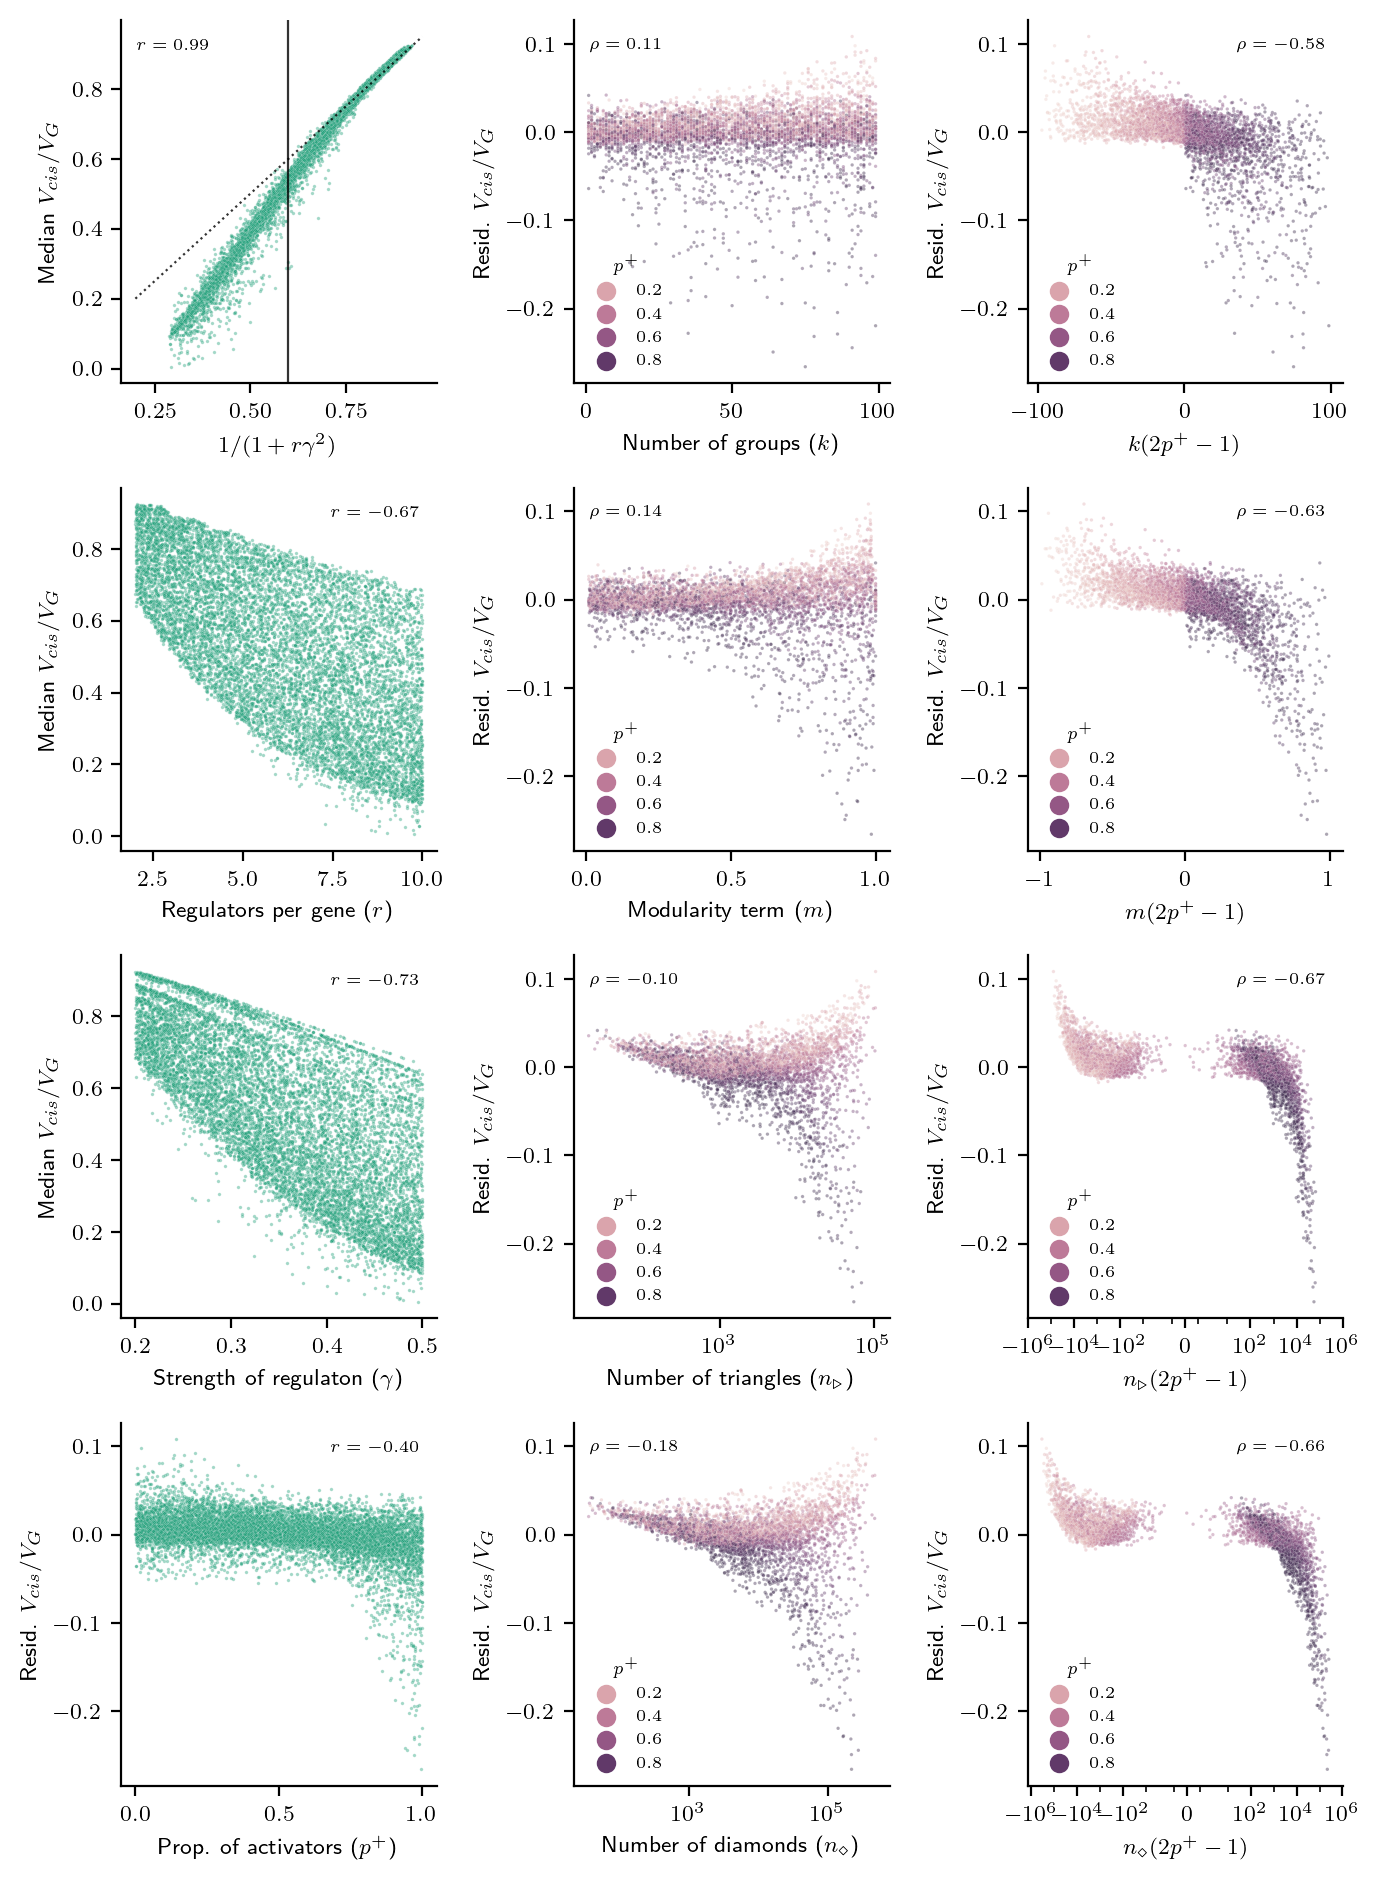

In [7]:
fig, axs = plt.subplots(4, 3, figsize=(7, 9.5), dpi=200);

for ix,(x, xl) in enumerate(
    {
        'I(1 / (1 + (r * (gamma ** 2))))': r'$1/(1+r\gamma^2)$',
        'r': 'Regulators per gene ({})'.format(r'$r$'),
        'gamma': 'Strength of regulaton ({})'.format(r'$\gamma$'),
        'p_up': 'Prop. of activators ({})'.format(r'$p^+$'),
    }.items()
):
    ax = axs[ix,0]
    if x == 'p_up':
        y = 'resid0'
        yl = 'Resid. $V_{cis}/V_{G}$'
    else:
        y = 'Median $V_{cis}/V_{G}$'
        yl = y
    sns.scatterplot(
        data = grns,
        y = y,
        x = x,
        s = 1.5,
        alpha = 0.4,
        ax = ax
    );
    ax.set_xlabel(xl);
    ax.set_ylabel(yl);
    if ix == 0:
        ax.plot([0.2, 0.95], [0.2, 0.95], 'k:', linewidth = 0.8, alpha=0.8);
        ax.axvline(x = 0.6, color='k', linestyle='-', linewidth = 0.8, alpha=0.8);
        ha, xx = 'left', 0.05
    else:
        ha, xx = 'right', 0.95
    ax.text(
        xx,
        0.95,
        r'$r={:.2f}$'.format(ss.pearsonr(grns[y], grns[x])[0]),
        ha = ha,
        va = 'top',
        fontsize = 6,
        transform = ax.transAxes
    );


for ix,(x, xl) in enumerate(
    {
        'k': 'Number of groups ({})'.format(r'$k$'),
        'm': 'Modularity term ({})'.format(r'$m$'),
        'triangles': 'Number of triangles ({})'.format(r'$n_\triangleright$'),
        'diamonds': 'Number of diamonds ({})'.format(r'$n_\diamond$'),
    }.items()
):
    ax = axs[ix,1]
    df = grns.loc[grns['I(1 / (1 + (r * (gamma ** 2))))'] < 0.6,:]
    y,yl = 'resid0', 'Resid. $V_{cis}/V_{G}$'
    sns.scatterplot(
        data = df,
        y = y,
        x = x,
        hue = 'p_up',
        s = 1.5,
        alpha = 0.4,
        ax = ax
    );
    ax.set_xlabel(xl);
    ax.set_ylabel(yl);
    ax.legend(frameon=0, loc='lower left', fontsize=6, title=r'$p^+$', title_fontsize=6);
    if ix < 4:
        ha, xx = 'left', 0.05
    else:
        ha, xx = 'right', 0.95
    ax.text(
        xx,
        0.95,
        r'$\rho={:.2f}$'.format(ss.spearmanr(df[y], df[x])[0]),
        ha = ha,
        va = 'top',
        fontsize = 6,
        transform = ax.transAxes
    );
    if x in ['triangles','diamonds']:
        ax.set_xscale('log');
        
        
for ix,(x, xl) in enumerate(
    {
        'k': r'$k(2p^+ - 1)$',
        'm': r'$m(2p^+ - 1)$',
        'triangles': r'$n_\triangleright(2p^+ - 1)$',
        'diamonds': r'$n_\diamond(2p^+ - 1)$',
    }.items()
):
    ax = axs[ix,2]
    df = grns.loc[grns['I(1 / (1 + (r * (gamma ** 2))))'] < 0.6,:]
    y,yl = 'resid0', 'Resid. $V_{cis}/V_{G}$'
    df['temp'] = df[x] * (2*df['p_up'] - 1)
    sns.scatterplot(
        data = df,
        y = y,
        x = 'temp',
        hue = 'p_up' if x in ['triangles','diamonds'] else 'p_up',
        s = 1.5,
        alpha = 0.4,
        ax = ax
    );
    ax.set_xlabel(xl);
    ax.set_ylabel(yl);
    ax.legend(frameon=0, loc='lower left', fontsize=6, title=r'$p^+$', title_fontsize=6);
    if ix > 4:
        ha, xx = 'left', 0.05
    else:
        ha, xx = 'right', 0.95
    ax.text(
        xx,
        0.95,
        r'$\rho={:.2f}$'.format(ss.spearmanr(df[y], df['temp'])[0]),
        ha = ha,
        va = 'top',
        fontsize = 6,
        transform = ax.transAxes
    );
    if x in ['triangles','diamonds']:
        ax.set_xscale('symlog');
        ax.set_xticks(sorted([s*(10**x) for x in [2, 4, 6] for s in [-1,1]]+[0]));

sns.despine();
fig.tight_layout();
fig.savefig('png/supplement/Fig_S3B.png');

# Figure 3

In [8]:
#grns = grns.loc[(1/(1 + grns['r']*(grns['gamma']**2))) < 0.6]
model0 = sm.ols('y ~ 1 + I(1/(1 + (r*(gamma**2))))', data = grns).fit()
model1 = sm.ols('y ~ 1 + I(1/(1 + (r*(gamma**2)))) + I(triangles * (p_up - 0.5)) + I(diamonds * ((p_up - 0.5)**2))', data = grns).fit()
print(model0.summary())
print(model1.summary())
grns['resid0'] = model0.resid
grns['resid1'] = model1.resid
print(sm.ols('y ~ 1 + r + gamma + p_up + k + m', data = grns).fit().summary())
print(sm.ols('resid1 ~ 1 + r + gamma + p_up + k + m', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 6.541e+05
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:55:24   Log-Likelihood:                 22328.
No. Observations:               10000   AIC:                        -4.465e+04
Df Residuals:                    9998   BIC:                        -4.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

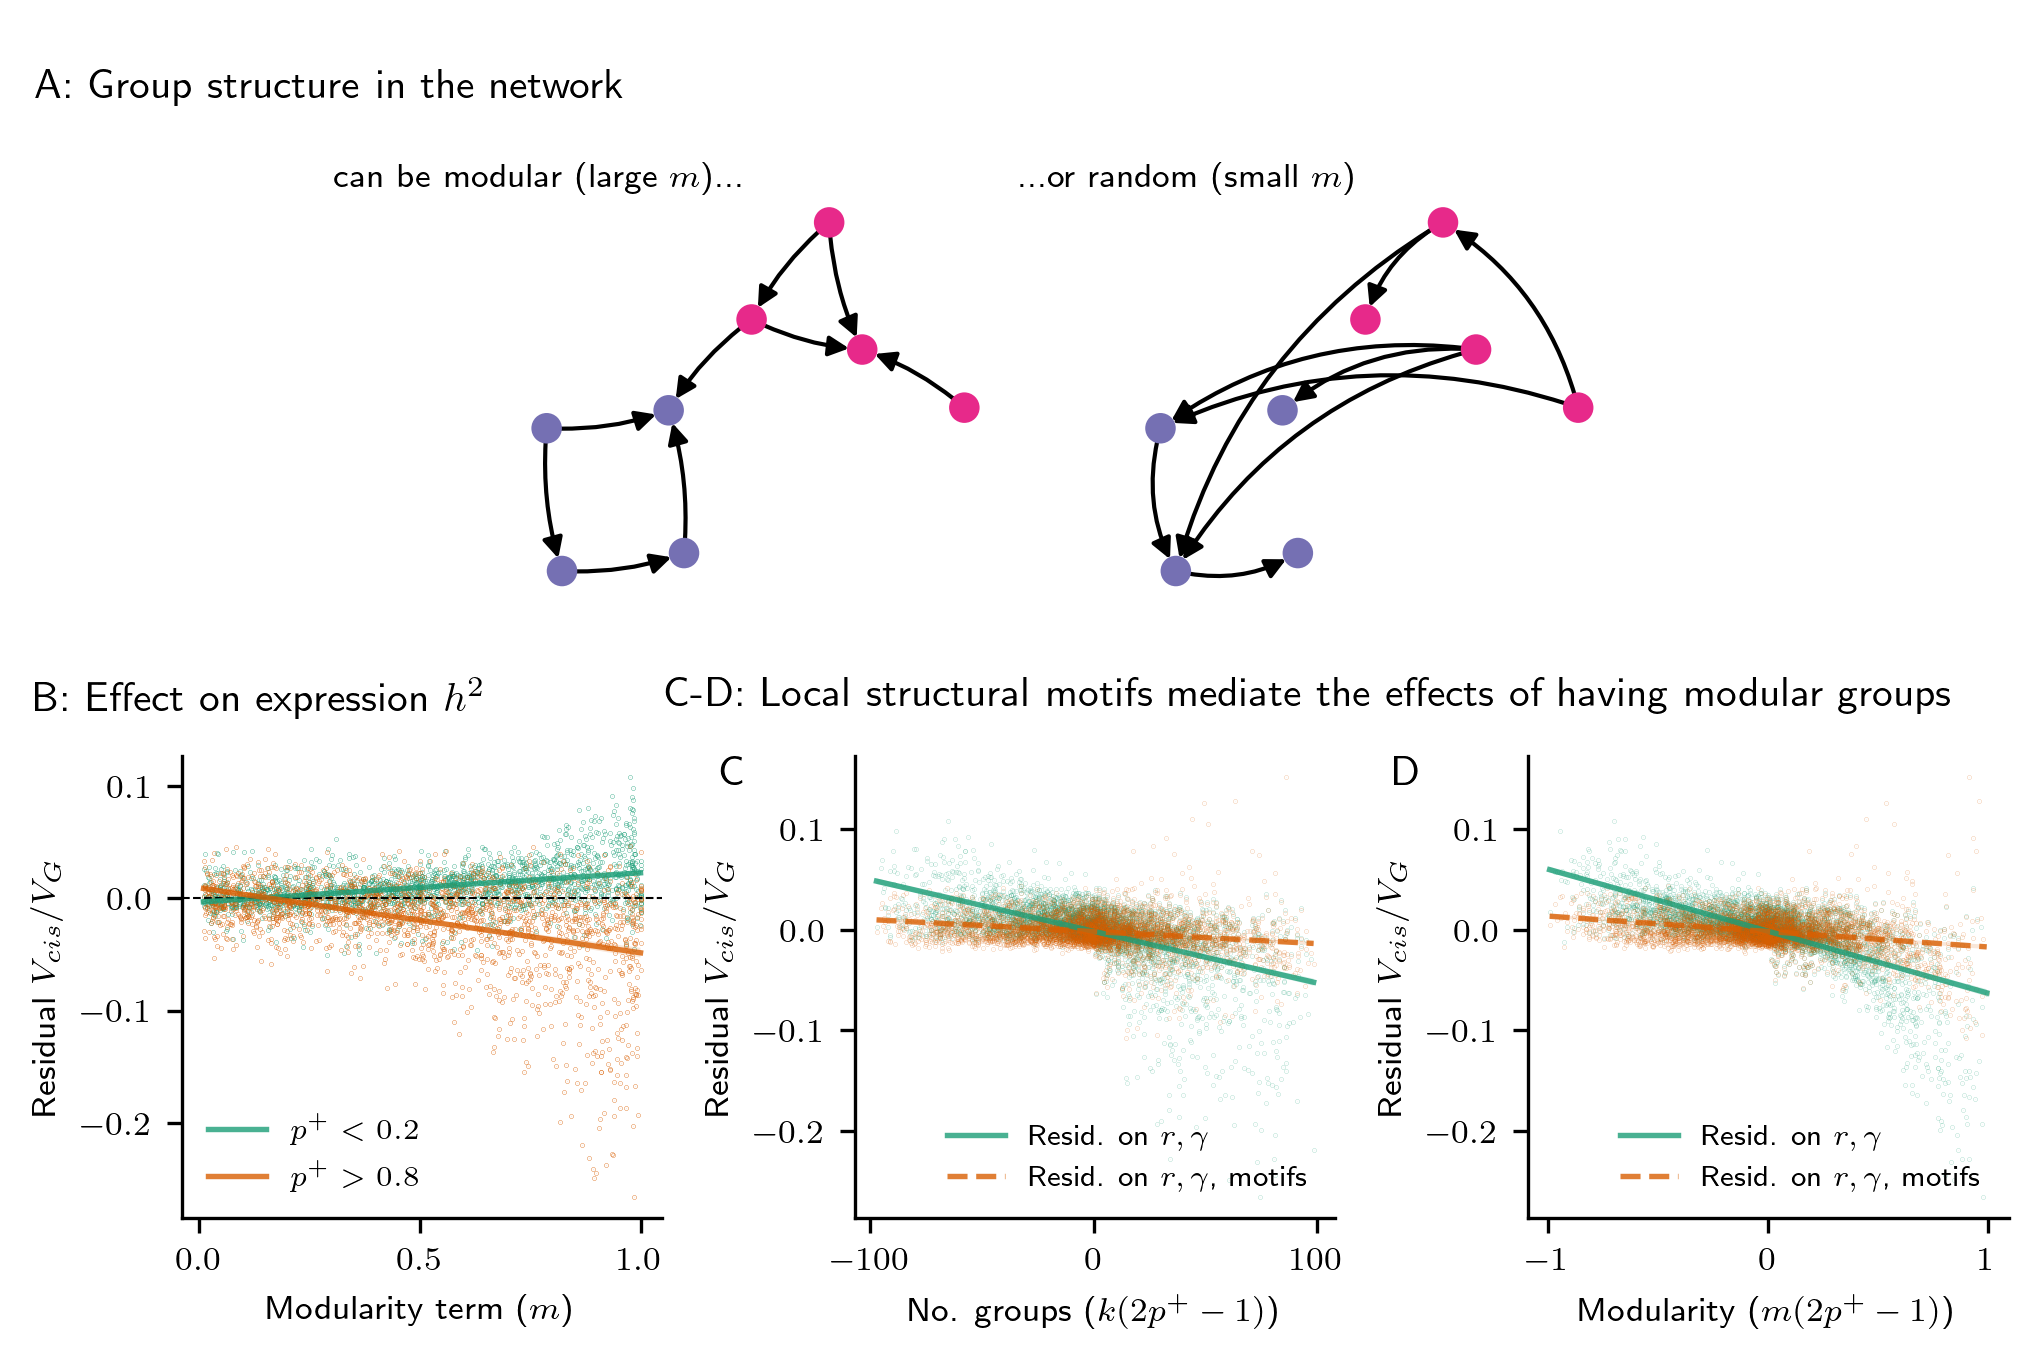

In [9]:
fig = plt.figure(figsize=(7, 4.4), dpi=300);
gs1 = fig.add_gridspec(nrows=1, ncols=2, left=0.2, right=0.8, bottom=0.55, top=1.0, wspace=0.1, width_ratios=[1, 1])
gs2 = fig.add_gridspec(nrows=1, ncols=3, left=0.08, right=0.95, bottom=0.1, top=0.45, wspace=0.4, width_ratios=[1, 1, 1])

# fig, axs = plt.subplots(2, 3, figsize=(7, 4.4), dpi=200)

#ax = axs[0,0]
ax = fig.add_subplot(gs1[0,0]);

G = nx.DiGraph(np.triu(nx.to_numpy_array(nx.planted_partition_graph(l = 2, k = 4, p_in = 0.7, p_out = 0.1, seed = 0, directed = False))))
H = nx.DiGraph(np.triu(nx.to_numpy_array(nx.planted_partition_graph(l = 2, k = 4, p_in = 0.4, p_out = 0.4, seed = 1, directed = False))))
nx.draw(G,
        ax = ax,
        pos = nx.kamada_kawai_layout(G),
        node_size = 40,
        node_color = [plt.get_cmap('Dark2')(2 + (i < len(G) // 2)) for i in G],
        label = None,
        connectionstyle="arc3,rad=0.1")

#print(ax.get_xlim(), ax.get_ylim())
ax.set_xlim(-1.3, 1.3); ax.set_ylim(-0.8, 1.4);


# ax = axs[0,1]
ax = fig.add_subplot(gs1[0,1]);
nx.draw(H,
        ax = ax,
        pos = nx.kamada_kawai_layout(G),
        node_size = 40,
        node_color = [plt.get_cmap('Dark2')(2 + (i < len(G) // 2)) for i in G],
        label = None,
        connectionstyle="arc3,rad=0.2"
       );

#print(ax.get_xlim(), ax.get_ylim())
ax.set_xlim(-1.1, 1.5); ax.set_ylim(-0.8, 1.4);

fig.text(0.02-0.01, 0.97, 'A: Group structure in the network', ha='left', va='top');
fig.text(0.22+0.03, 0.9, 'can be modular (large {})...'.format(r'$m$'), fontsize=8, ha='center', va='top');
fig.text(0.51+0.05, 0.9, '...or random (small {})'.format(r'$m$'), fontsize=8, ha='center', va='top');


ax = fig.add_subplot(gs2[0,0]);
ax.axhline(
    0, # grns['Median '+r'$V_{cis}/V_{G}$'].mean(), 
    linewidth = 0.5, 
    color = 'k', 
    linestyle = 'dashed', 
    label = None
);

for i, q in enumerate([r'p_up < 0.2', r'p_up > 0.8']):
    sns.regplot(data = grns.query(q), 
                x = 'm', 
                y = 'resid0', #'Median '+r'$V_{cis}/V_{G}$',
                color = plt.get_cmap('Dark2')(i),
                order = 1,
                scatter = True,
                line_kws = dict(alpha=0.8, linewidth = 1.3, label = r'${}$'.format(q.replace('p_up','p^+'))),
                scatter_kws = dict(s = 0.01, alpha=0.9, label=None),
                ax = ax
               )
    ax.set_title('.', color='white');

ax.set_ylabel('Residual ' + r'$V_{cis}/V_{G}$');
ax.legend(frameon=False, loc='lower left');
ax.set_xlabel('Modularity term ({})'.format(r'$m$'));
#fig.text(0.69, 0.98, 'B: Effect on expression {}'.format(r'$h^2$'), ha='left', va='top');
fig.text(0.01, 0.51, 'B: Effect on expression {}'.format(r'$h^2$'), ha='left', va='top');
ax.text(-0.31, 1.0, '', ha='left', va='top', transform=ax.transAxes);

for i, (par,label) in enumerate(zip([r'$k(2p^+ - 1)$',r'$m(2p^+ - 1)$'], ['No. groups', 'Modularity'])):
    #ax = axs[1, i]
    ax = fig.add_subplot(gs2[0,1+i]);
    for j in range(2):
        sns.regplot(
            data = grns.loc[grns['I(1 / (1 + (r * (gamma ** 2))))'] < 0.6],
            x = par, 
            y = 'resid' + str(j), 
            ax = ax, 
            lowess = (par == 'd'),
            scatter = True,
            line_kws = dict(alpha = 0.8, linewidth = 1.3, linestyle='--'[:(1+j)], label='Resid. on ' + r'$r,\gamma$' + ('' if j == 0 else ', motifs')),
            scatter_kws = dict(s = 0.01, alpha=0.4, label='Resid. on ' + r'$r,\gamma$' + ('' if j == 0 else ', motifs')),
        )
    ax.legend(loc='lower right', frameon=False)
    ax.set_ylabel('Residual ' + r'$V_{cis}/V_{G}$');
    ax.set_xlabel('{1} ({0})'.format(par, label));
    ax.text(-0.28, 1.0, 'CD'[i], ha='left', va='top', transform=ax.transAxes);
                                

#fig.text(0.02, 0.51, 'C: Local structural motifs mediate the effects of having modular groups', ha='left', va='top');
fig.text(0.31, 0.51, 'C-D: Local structural motifs mediate the effects of having modular groups', ha='left', va='top');

#axs[1,2].set_axis_off()

sns.despine()
#fig.tight_layout()

plt.savefig('png/Figure3.png');

# Related work

## Sensitivity analysis

In [10]:
print(sm.ols('resid0 ~ 1 + I(k * (p_up - 0.5))', data = grns).fit().summary())
print(sm.ols('resid1 ~ 1 + I(k * (p_up - 0.5))', data = grns).fit().summary())
print(sm.ols('resid0 ~ 1 + I(m * (p_up - 0.5))', data = grns).fit().summary())
print(sm.ols('resid1 ~ 1 + I(m * (p_up - 0.5))', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 resid0   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2145.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:55:28   Log-Likelihood:                 23300.
No. Observations:               10000   AIC:                        -4.660e+04
Df Residuals:                    9998   BIC:                        -4.658e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept                3e-05    

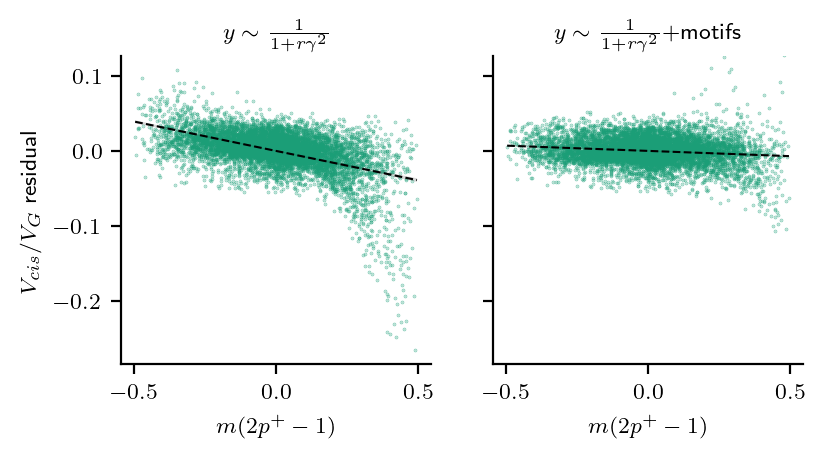

In [11]:
grns['I(m * (p_up - 0.5))'] = grns['m'] * (grns['p_up'] - 0.5)

grns['resid'] = sm.ols('y ~ 1 + I(1/(1 + r*(gamma**2)))', data = grns).fit().resid
#print(sm.ols('resid ~ 1 + p_up + I(p_up**2) + I(k * (p_up - 0.5)) + I(m * (p_up - 0.5)) + I(triangles * (p_up - 0.5)) + I(diamonds * p_up * (1 - p_up))', data = grns).fit().summary())

fig, ax = plt.subplots(1, 2, figsize=(4.4, 2), dpi=200)
sns.regplot(data = grns, x = 'I(m * (p_up - 0.5))', y = 'resid', ax = ax[0], scatter_kws=dict(s=1e-1, alpha=0.5), line_kws=dict(linewidth=0.75, color='k', linestyle='dashed'))
ax[0].set_xlabel(r'$m (2p^+ - 1)$');
ax[0].set_ylabel(r'$V_{cis}/V_{G}$' + ' residual');
ax[0].set_title(r'$y \sim \frac{1}{1 + r \gamma^2}$');

grns['resid'] = sm.ols('y ~ 1 + I(1/(1 + r*(gamma**2))) + I(triangles * (1 - 2*p_up)) + I(diamonds * (1 - 2*p_up)**2)', data = grns).fit().resid
sns.regplot(data = grns, x = 'I(m * (p_up - 0.5))', y = 'resid', ax = ax[1], scatter_kws=dict(s=1e-1, alpha=0.5), line_kws=dict(linewidth=0.75, color='k', linestyle='dashed'))
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_ylabel(None); ax[1].set_yticklabels(['' for _ in ax[1].get_yticklabels()]);
ax[1].set_xlabel(r'$m (2p^+ - 1)$');
ax[1].set_title(r'$y \sim \frac{1}{1 + r \gamma^2} + $' + 'motifs');

#plt.tight_layout()
sns.despine()

In [12]:
grns['resid'] = sm.ols('y ~ 1 + I(1/(1 + r*(gamma**2)))', data = grns).fit().resid
print(sm.ols('resid ~ 1 + p_up + I(p_up**2) + I(k * (p_up - 0.5)) + I(m * (p_up - 0.5)) + I(triangles * (p_up - 0.5)) + I(diamonds * (p_up - 0.5) ** 2 )', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     2549.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:55:32   Log-Likelihood:                 26970.
No. Observations:               10000   AIC:                        -5.393e+04
Df Residuals:                    9993   BIC:                        -5.388e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [13]:
print(sm.ols('y ~ I(1 / (1 + (r * (gamma ** 2)))) + p_up + I(p_up ** 2) + I(k * (p_up - 0.5)) + I(m * (p_up - 0.5)) + I(triangles * (p_up - 0.5)) + I(diamonds * (p_up - 0.5) ** 2)', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.402e+05
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:55:32   Log-Likelihood:                 27007.
No. Observations:               10000   AIC:                        -5.400e+04
Df Residuals:                    9992   BIC:                        -5.394e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

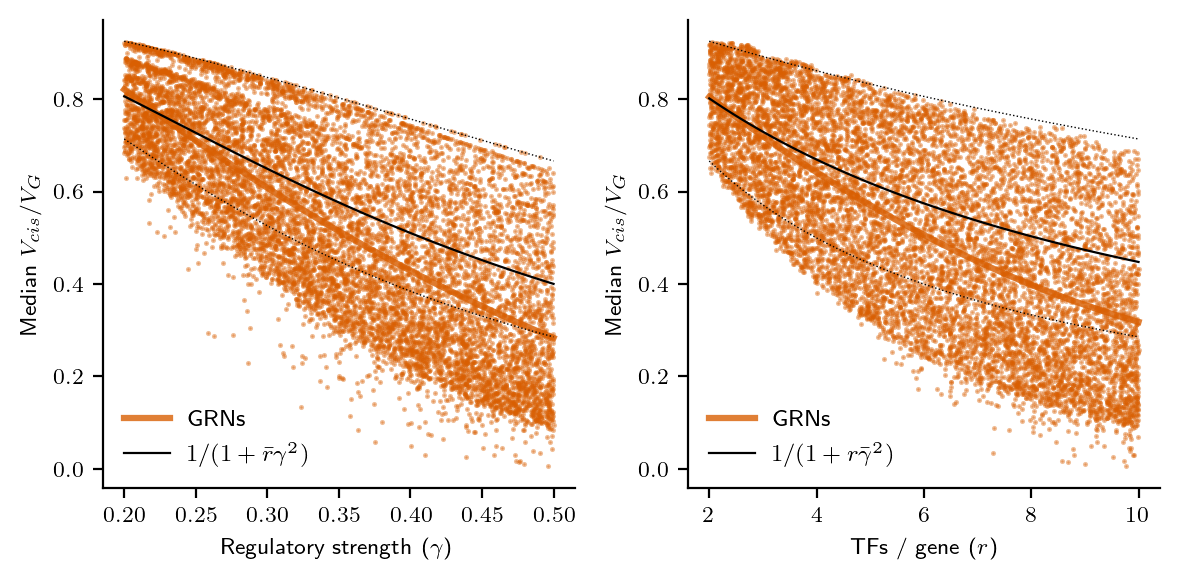

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=200);

data = grns.query('~hier')

sns.regplot(data = data, 
            x = 'gamma', 
            y = 'Median '+r'$V_{cis}/V_{G}$', 
            color = plt.get_cmap('Dark2')(i),
            order = 2,
            scatter = True,
            line_kws = dict(alpha=0.8, label='GRNs'),
            scatter_kws = dict(s=0.7, alpha=0.4, label=None),
            ax = ax[0], 
)

for r, lw, ls, label in zip(grns['r'].quantile([0, 0.5, 1.0]).values, 
                            [0.5, 0.8, 0.5], 
                            ':-:', 
                            ['',r'$1/(1+\bar{r}\gamma^2)$','']):
    gamma = np.linspace(*grns['gamma'].quantile([0, 1]).values, 100)
    ax[0].plot(gamma, 1./(1 + r*(gamma**2)), linewidth=lw, linestyle=ls, color='k', label=label);

ax[0].set_xlabel('Regulatory strength ({})'.format(r'$\gamma$'));
ax[0].legend(fontsize='small', frameon=0, loc='lower left');
    
sns.regplot(data = data, 
            x = 'r', 
            y = 'Median '+r'$V_{cis}/V_{G}$', 
            color = plt.get_cmap('Dark2')(i),
            order = 2,
            scatter = True,
            line_kws = dict(alpha=0.8, label='GRNs'),
            scatter_kws = dict(s=0.7, alpha=0.4, label=None),
            ax = ax[1]
)

for gamma, lw, ls, label in zip(grns['gamma'].quantile([0, 0.5, 1.0]).values, 
                            [0.5, 0.8, 0.5], 
                            ':-:', 
                            ['',r'$1/(1+r\bar{\gamma}^2)$','']):
    r = np.linspace(*grns['r'].quantile([0, 1]).values, 100)
    ax[1].plot(r, 1./(1 + r*(gamma**2)), linewidth=lw, linestyle=ls, color='k', label=label);
    
ax[1].set_xlabel('TFs / gene ({})'.format(r'$r$'));
ax[1].legend(fontsize='small', frameon=0, loc='lower left');

sns.despine(); fig.tight_layout();

## Parameter effects

### Plot

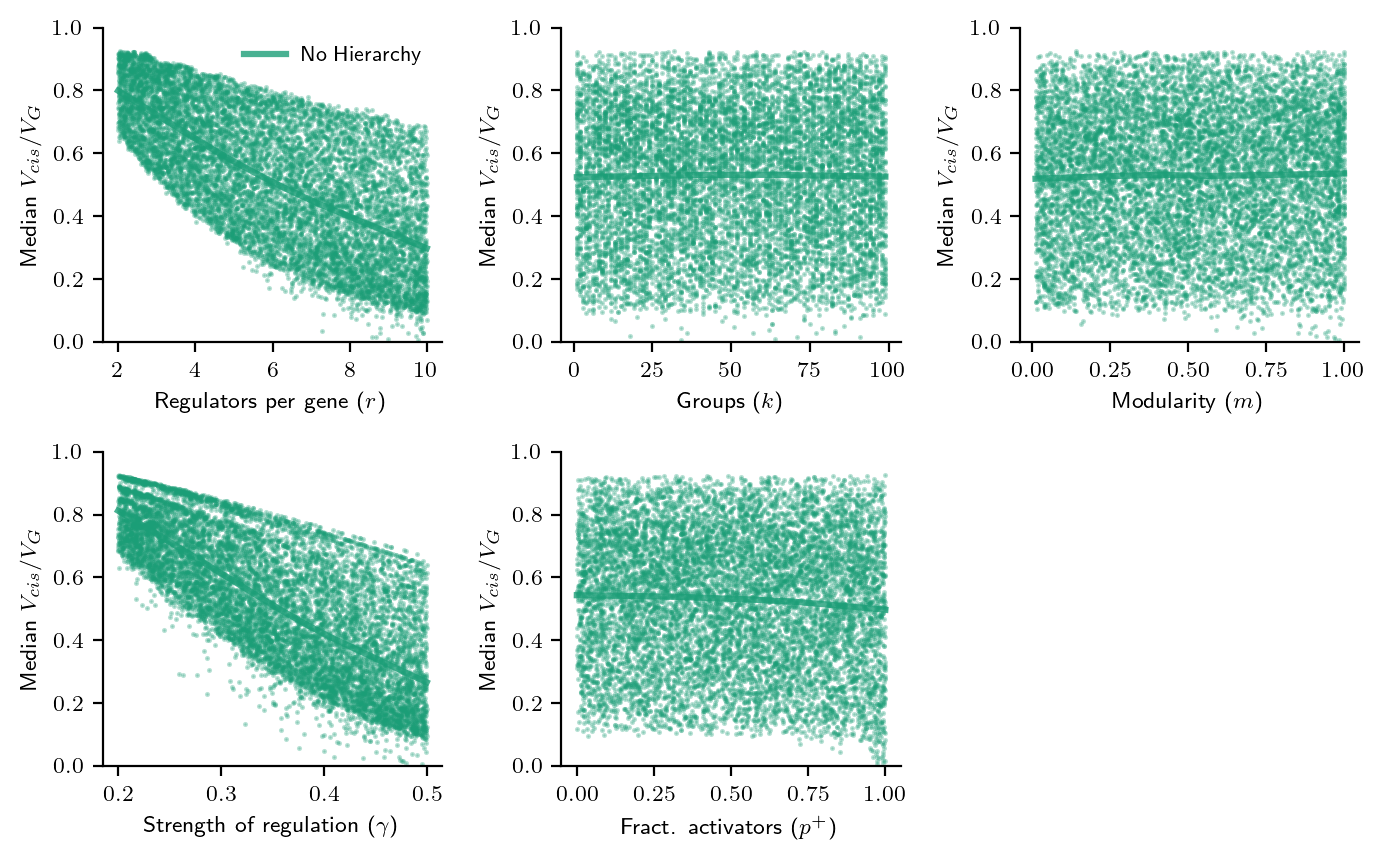

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(7, 4.4), dpi=200)

for (ix, iy), par, label in zip(np.ndindex(axs.shape),
                                ['r','k','m','gamma','p_up',''],
                                ['Regulators per gene ({})'.format(r'$r$'), 
                                 'Groups ({})'.format(r'$k$'), 
                                 'Modularity ({})'.format(r'$m$'), 
                                 'Strength of regulation ({})'.format(r'$\gamma$'), 
                                 'Fract. activators ({})'.format(r'$p^+$'),
                                 '']):
    ax = axs[ix, iy]
    if not par: 
        ax.axis('off');
        continue
    for i, b in enumerate([0,1]):
        sns.regplot(data = grns.loc[grns['hier']==b], 
                    x = par, 
                    y = 'Median '+r'$V_{cis}/V_{G}$', 
                    color = plt.get_cmap('Dark2')(i),
                    lowess = True,
                    scatter = True,
                    line_kws = dict(alpha=0.8, label=('No ' if not b else '')+'Hierarchy'),
                    scatter_kws = dict(s=0.7, alpha=0.3, label=None),
                    ax = ax
                   )
    ax.set_ylim(0, 1);
    ax.set_xlabel(label);
    if ix == 0 and iy == 0:
        ax.legend(fontsize=7.5, frameon=False, loc='upper right');

# overall figure stuff
sns.despine();
fig.tight_layout();

[]

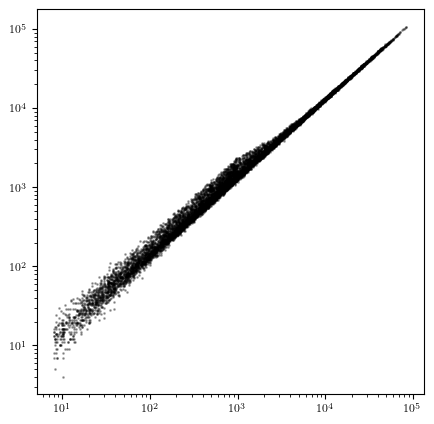

In [16]:
plt.figure(figsize=(5,5))

plt.plot(np.maximum(1, grns.k * (grns.m ** 3)) * (grns.r ** 3), 
         grns['triangles'], 
         'k.', ms=2, alpha=0.3)

plt.loglog()

count    10000.000000
mean         1.514628
std          3.001894
min          0.080993
25%          0.432046
50%          0.841352
75%          1.818184
max        187.857672
Name: z, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 3.666e+05
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:55:45   Log-Likelihood:                 24896.
No. Observations:               10000   AIC:                        -4.978e+04
Df Residuals:                    9996   BIC:                        -4.976e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
          

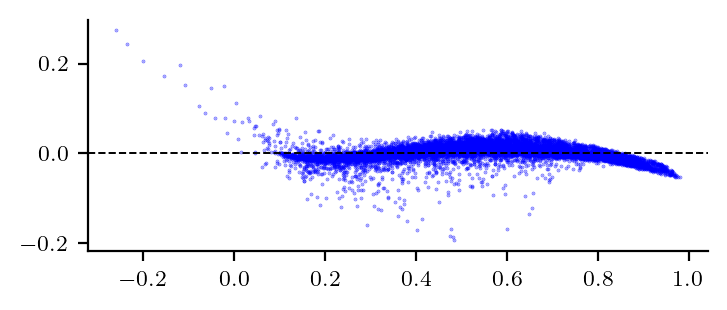

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     600.3
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:55:45   Log-Likelihood:                 26209.
No. Observations:               10000   AIC:                        -5.241e+04
Df Residuals:                    9994   BIC:                        -5.236e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0042      0.001     -4.147      0.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


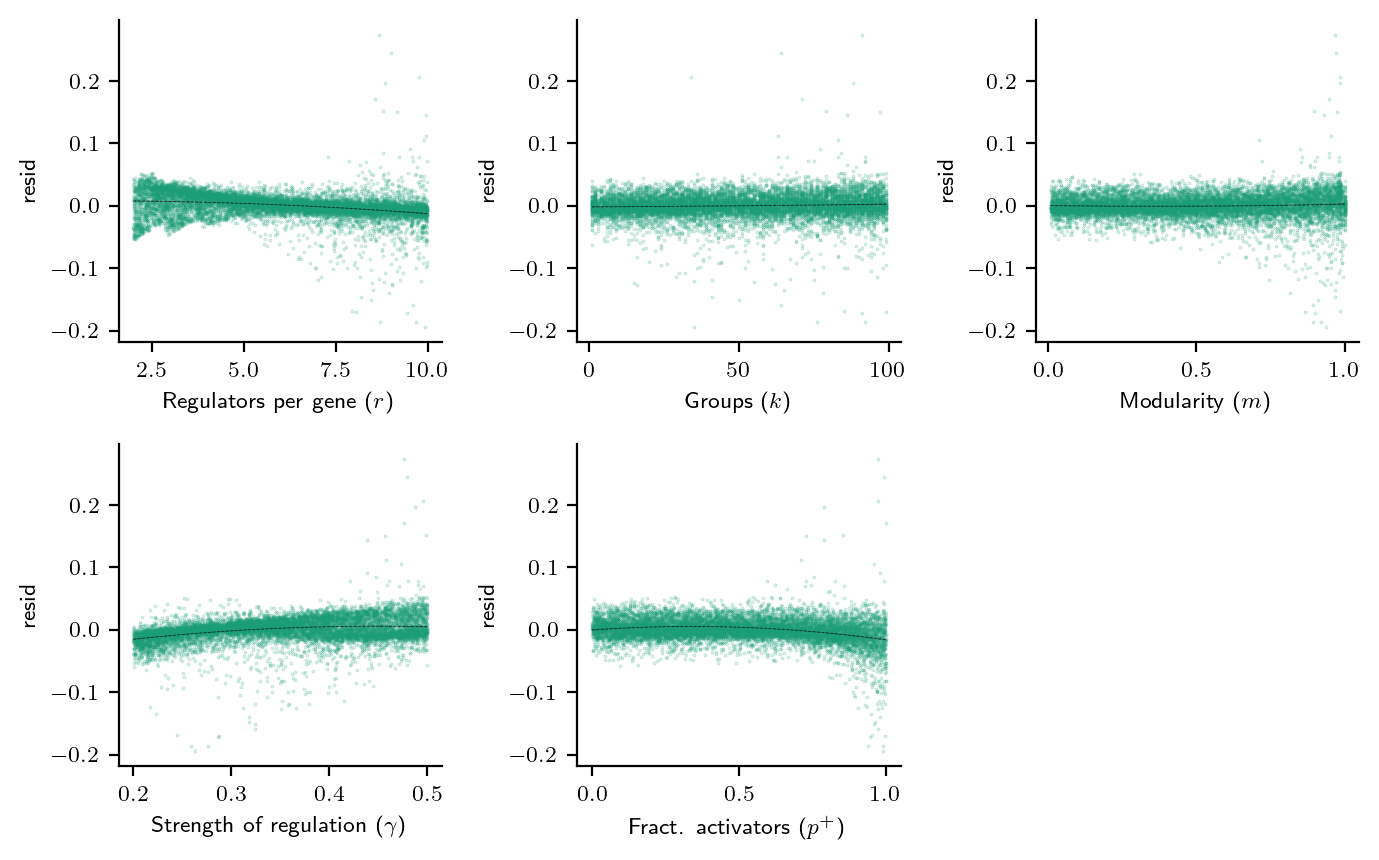

In [17]:
grns['z'] = ((1/grns.y) - 1)
print(grns.z.describe())

model = sm.ols('y ~ 1 + I(1./(1 + r*(gamma**2))) + I((gamma**3) * triangles * (p_up - 0.5)) + I((gamma**4) * diamonds * ((p_up - 0.5)**2))',# +
               #' + p_up + I(p_up**2) + I(m*(p_up - 0.5))', 
               data = grns).fit()
print(model.summary())

grns['resid'] = model.resid # grns.y - 1/(1 + grns.r*(grns.gamma**2))

plt.figure(figsize=(4, 1.5), dpi=200)
plt.plot(model.fittedvalues, model.resid, 'b.', alpha=0.5, ms=0.7);
plt.axhline(0, color='k', linewidth=0.7, linestyle='dashed');
sns.despine()
plt.show()

print(sm.ols('resid ~ 1 + r + gamma + p_up + m + k', data = grns).fit().summary())

fig, axs = plt.subplots(2, 3, figsize=(7, 4.4), dpi=200)

for (ix, iy), par, label in zip(np.ndindex(axs.shape),
                                ['r','k','m','gamma','p_up',''],
                                ['Regulators per gene ({})'.format(r'$r$'), 
                                 'Groups ({})'.format(r'$k$'), 
                                 'Modularity ({})'.format(r'$m$'), 
                                 'Strength of regulation ({})'.format(r'$\gamma$'), 
                                 'Fract. activators ({})'.format(r'$p^+$'),
                                 '']):
    ax = axs[ix, iy]
    if not par: 
        ax.axis('off');
        continue
    for i, b in enumerate([0,1]):
        sns.regplot(data = grns.loc[grns['hier']==b], 
                    x = par, 
                    y = 'resid', 
                    color = plt.get_cmap('Dark2')(i),
                    lowess = 0,
                    order = 2,
                    scatter = True,
                    line_kws = dict(alpha=0.7, color='k', linewidth=0.3, linestyle='dashed', label=None),
                    scatter_kws = dict(s=0.1, alpha=0.3, label=None),
                    ax = ax
                   )
    ax.set_xlabel(label);
    if ix == 0 and iy == 0:
        ax.legend(fontsize=7.5, frameon=False, loc='upper right');

# overall figure stuff
sns.despine();
fig.tight_layout();

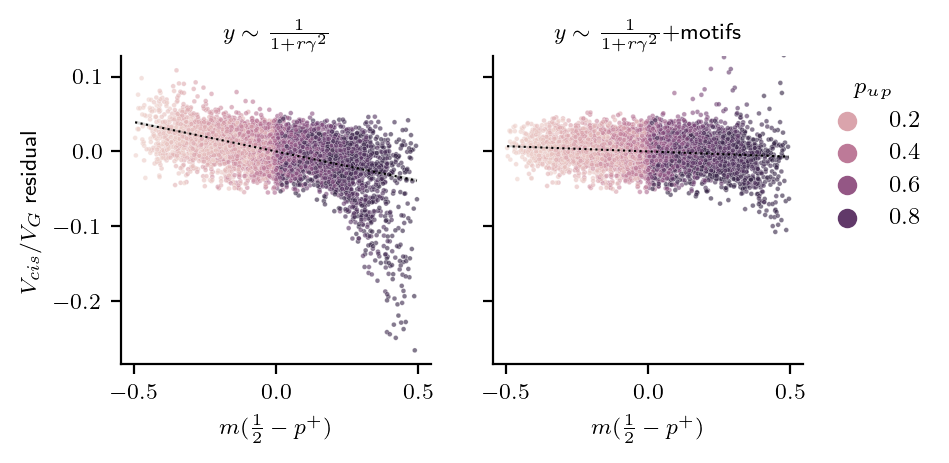

In [18]:
grns['resid'] = sm.ols('y ~ 1 + I(1/(1 + r*(gamma**2)))', data = grns).fit().resid
#print(sm.ols('resid ~ 1 + p_up + I(p_up**2) + I(k * (p_up - 0.5)) + I(m * (p_up - 0.5)) + I(triangles * (p_up - 0.5)) + I(diamonds * p_up * (1 - p_up))', data = grns).fit().summary())

fig, ax = plt.subplots(1, 2, figsize=(4.4, 2), dpi=200)
sns.scatterplot(data = grns, x = 'I(m * (p_up - 0.5))', y = 'resid', ax = ax[0], hue = 'p_up', s=3, alpha = 0.6, legend = None)
sns.regplot(data = grns, x = 'I(m * (p_up - 0.5))', y = 'resid', ax = ax[0], scatter=False, line_kws=dict(color = 'k', linewidth = 0.75, linestyle = 'dotted'))
ax[0].set_xlabel(r'$m (\frac{1}{2} - p^+)$');
ax[0].set_ylabel(r'$V_{cis}/V_{G}$' + ' residual');
ax[0].set_title(r'$y \sim \frac{1}{1 + r \gamma^2}$');

grns['resid'] = sm.ols('y ~ 1 + I(1/(1 + r*(gamma**2))) + I(triangles * (p_up - 0.5)) + I(diamonds * ((p_up - 0.5)**2))', data = grns).fit().resid
sns.scatterplot(data = grns, x = 'I(m * (p_up - 0.5))', y = 'resid', ax = ax[1], hue = 'p_up', s=3, alpha = 0.6)
sns.regplot(data = grns, x = 'I(m * (p_up - 0.5))', y = 'resid', ax = ax[1], scatter=False, line_kws=dict(color = 'k', linewidth = 0.75, linestyle = 'dotted'))
ax[1].legend(fontsize='small', title=r'$p_{up}$', title_fontsize='small', frameon=False, bbox_to_anchor=(1,1));
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_ylabel(None); ax[1].set_yticklabels(['' for _ in ax[1].get_yticklabels()]);
ax[1].set_xlabel(r'$m (\frac{1}{2} - p^+)$');
ax[1].set_title(r'$y \sim \frac{1}{1 + r \gamma^2} + $' + 'motifs');

#plt.tight_layout()
sns.despine()

### Regression analysis

In [19]:
grns['y'] = grns['Median '+r'$V_{cis}/V_{G}$']

print(sm.ols('y ~ 1 + gamma + p_up + r + k + m', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 5.373e+04
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:03   Log-Likelihood:                 17988.
No. Observations:               10000   AIC:                        -3.596e+04
Df Residuals:                    9994   BIC:                        -3.592e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5189      0.002    653.823      0.0

In [20]:
print(sm.ols('y ~ 1 + gamma + p_up + r + k + m', data = grns.query('p_up > 0.8')).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     9860.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:03   Log-Likelihood:                 3425.8
No. Observations:                2008   AIC:                            -6840.
Df Residuals:                    2002   BIC:                            -6806.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6935      0.016    105.909      0.0

In [21]:
print(sm.ols('y ~ 1 + gamma + I(gamma**2) + p_up + r + I(diamonds*(p_up - 0.5)) + I(triangles*(p_up - 0.5))', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 5.504e+04
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:03   Log-Likelihood:                 18987.
No. Observations:               10000   AIC:                        -3.796e+04
Df Residuals:                    9993   BIC:                        -3.791e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [22]:
grns['y'] = grns['Median '+r'$V_{cis}/V_{G}$']

grns['x2'] = grns['p_up'] ** 2

print(sm.ols('y ~ 1 + p_up + x2 + r + k + m + diamonds + triangles', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     1182.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:03   Log-Likelihood:                 4365.1
No. Observations:               10000   AIC:                            -8714.
Df Residuals:                    9992   BIC:                            -8656.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8867      0.009     95.350      0.0

In [23]:
grns['y'] = grns['Median '+r'$V_{cis}/V_{G}$']

print(sm.ols('y ~ 1 + p_up + r + gamma + triangles + diamonds', data = grns.query('~hier')).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                 5.494e+04
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:03   Log-Likelihood:                 18095.
No. Observations:               10000   AIC:                        -3.618e+04
Df Residuals:                    9994   BIC:                        -3.613e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5204      0.002    736.422      0.0

In [24]:
grns['Mean '+r'$V_{cis}/V_{G}$'] = grns[r'$V_{cis}/V_{G}$'].apply(lambda x: np.quantile(x, q=0.2))
grns['y2'] = grns['Mean '+r'$V_{cis}/V_{G}$']

print(sm.ols('y2 ~ 1 + r + gamma + p_up + k + m:hier', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 4.186e+04
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:04   Log-Likelihood:                 16522.
No. Observations:               10000   AIC:                        -3.303e+04
Df Residuals:                    9994   BIC:                        -3.299e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.3954      0.003    518.728

## QTL effects

model     n         r   k     gamma      p_up   hier          w         m  \
16   ppm  5000  7.493347   9  0.390814  0.292771  False  23.062789  0.742457   
59   ppm  5000  7.116191  75  0.393872  0.028741  False  56.712336  0.433871   

                                    $V_{cis}/V_{tot}$  ...    resid0  \
16  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  ... -0.000607   
59  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...  ...  0.009790   

      resid1  $m(2p^+ - 1)$  $k(2p^+ - 1)$ I(m * (p_up - 0.5))     resid  \
16 -0.006465      -0.307717      -3.730122           -0.153859 -0.006465   
59  0.000166      -0.408932     -70.688849           -0.204466  0.000166   

           z        x2 Mean $V_{cis}/V_{G}$        y2  
16  1.970639  0.085715             0.170131  0.170131  
59  1.780341  0.000826             0.186707  0.186707  

[2 rows x 33 columns]

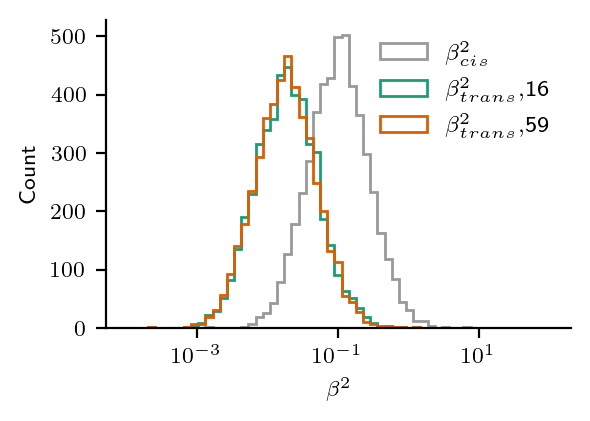

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(3,2), dpi=200)

V_cis = np.random.lognormal(np.log(0.1), 1, size=(n_genes,))
ax.hist(V_cis, 
        histtype='step', 
        bins=np.geomspace(1e-4, 1e2, 60),
        alpha=0.8,
        color='gray',
        label=r'$\beta^2_{cis}$'
);

x = grns.query('gamma <= 0.4 & r <= 7.5 & 0.15 < y & y < 0.38 & ~hier').head(2)
#x = grns.loc[[1222,420],:]
display(x)

for ix in x.index[:2]:
    with open('.'.join((grn_stub, str(ix), 'pkl')), 'rb') as g:
        G = pickle.load(g)
    V_trans = (G.L @ np.diag(np.sqrt(V_cis))) ** 2

    ax.hist((V_trans - np.diag(np.diag(V_trans))).max(axis=0), 
             histtype='step', 
             bins=np.geomspace(1e-4, 1e2, 60),
             label=r'$\beta^2_{trans},$'+str(ix)
            );
    
ax.legend(fontsize='small', frameon=False);
ax.set_xscale('log');
ax.set_xlabel(r'$\beta^2$'); 
ax.set_ylabel('Count');
sns.despine();

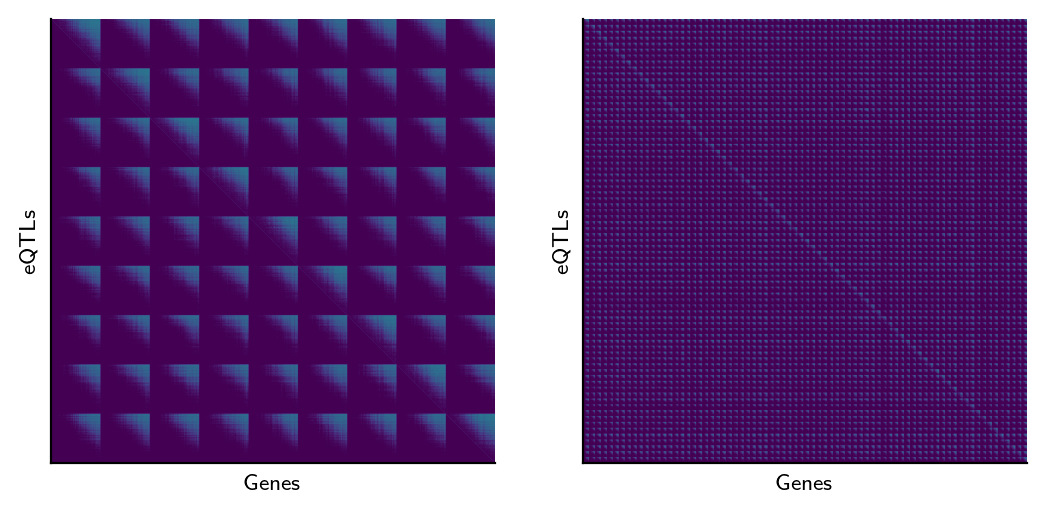

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(6.3, 3), dpi=200);

for i,g_ix in enumerate(x.index):
    with open('.'.join((grn_stub, str(g_ix), 'pkl')), 'rb') as g:
        G = pickle.load(g) 

    o = np.array([gene for group in range(max(G.I) + 1) for gene,gp in enumerate(G.I) if gp == group])
    V = np.abs(G.L) / np.sqrt(np.abs(G.L.T @ G.L))
    V = V[np.ix_(o,o)]

    ax[i].imshow(np.clip(np.nan_to_num(np.log10(V), -3), -3, 3))
    
    ax[i].set_xticks([]);
    ax[i].set_yticks([]);

    ax[i].set_ylabel('eQTLs');    
    ax[i].set_xlabel('Genes');
    
sns.despine();

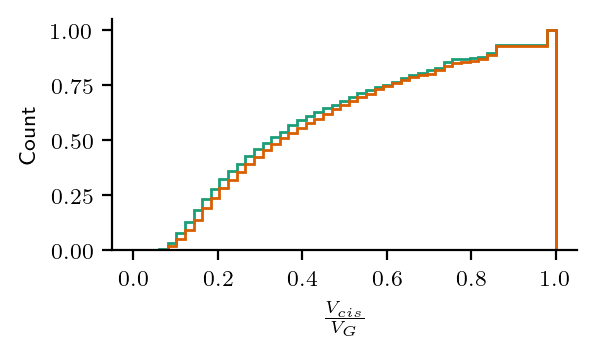

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(3,1.5), dpi=200)

for ix in x.index:
    with open('.'.join((grn_stub, str(ix), 'pkl')), 'rb') as g:
        G = pickle.load(g)
    V_trans = (G.L @ np.diag(np.sqrt(V_cis))) ** 2

    ax.hist(G.cish2, 
            histtype='step',
            cumulative=True,
            density=True,
            bins=np.linspace(0, 1, 50), 
            );
    
ax.set_xlabel(r'$\frac{V_{cis}}{V_{G}}$'); 
ax.set_ylabel('Count');
sns.despine();

## Incoming and outgoing _trans_-effects

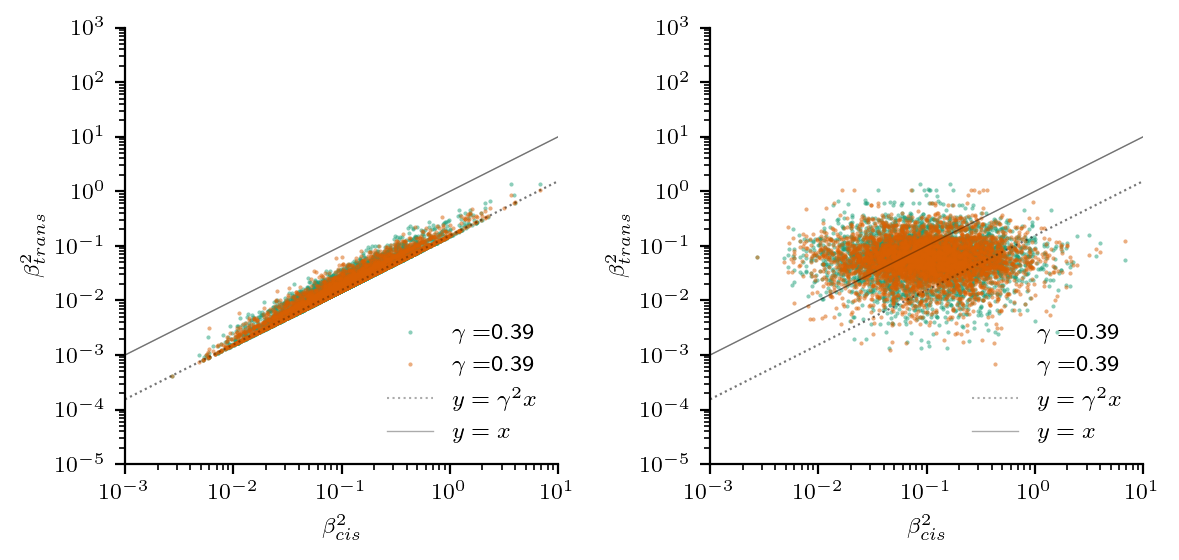

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2.9), dpi=200);

V_cis = np.random.lognormal(np.log(0.1), 1, size=(n_genes,))

xl = np.array([1e-3,1e1])
yl = np.array([1e-5,1e3])

for i,(_,row) in enumerate(x.iterrows()):
    with open('.'.join((grn_stub, str(row.name), 'pkl')), 'rb') as g:
        G = pickle.load(g)

    V_trans = (G.L @ np.diag(np.sqrt(V_cis))) ** 2

    for j in range(2):
        axs[j].plot(V_cis, (V_trans - np.diag(np.diag(V_trans))).max(axis=j),
                 '.',
                 alpha=0.5,
                 ms=1,
                 label=r'$\gamma=$'+'{:.2f}'.format(row.gamma)
                );

        axs[j].plot(xl, row.gamma**2 * xl, 'k:', alpha=0.33, linewidth=0.75, label=r'$y = \gamma^2 x$' if i==1 else None);
        axs[j].plot(xl, xl, 'k-', alpha=0.33, linewidth=0.5, label=r'$y = x$' if i==1 else None);

for ax in axs:
    ax.legend(fontsize='small', frameon=False, loc='lower right');
    ax.set_xscale('log');
    ax.set_yscale('log');
    ax.set_xlabel(r'$\beta^2_{cis}$'); 
    ax.set_ylabel(r'$\beta^2_{trans}$'); 
    ax.set_xlim(xl);
    ax.set_ylim(yl);
    
sns.despine();
fig.tight_layout();

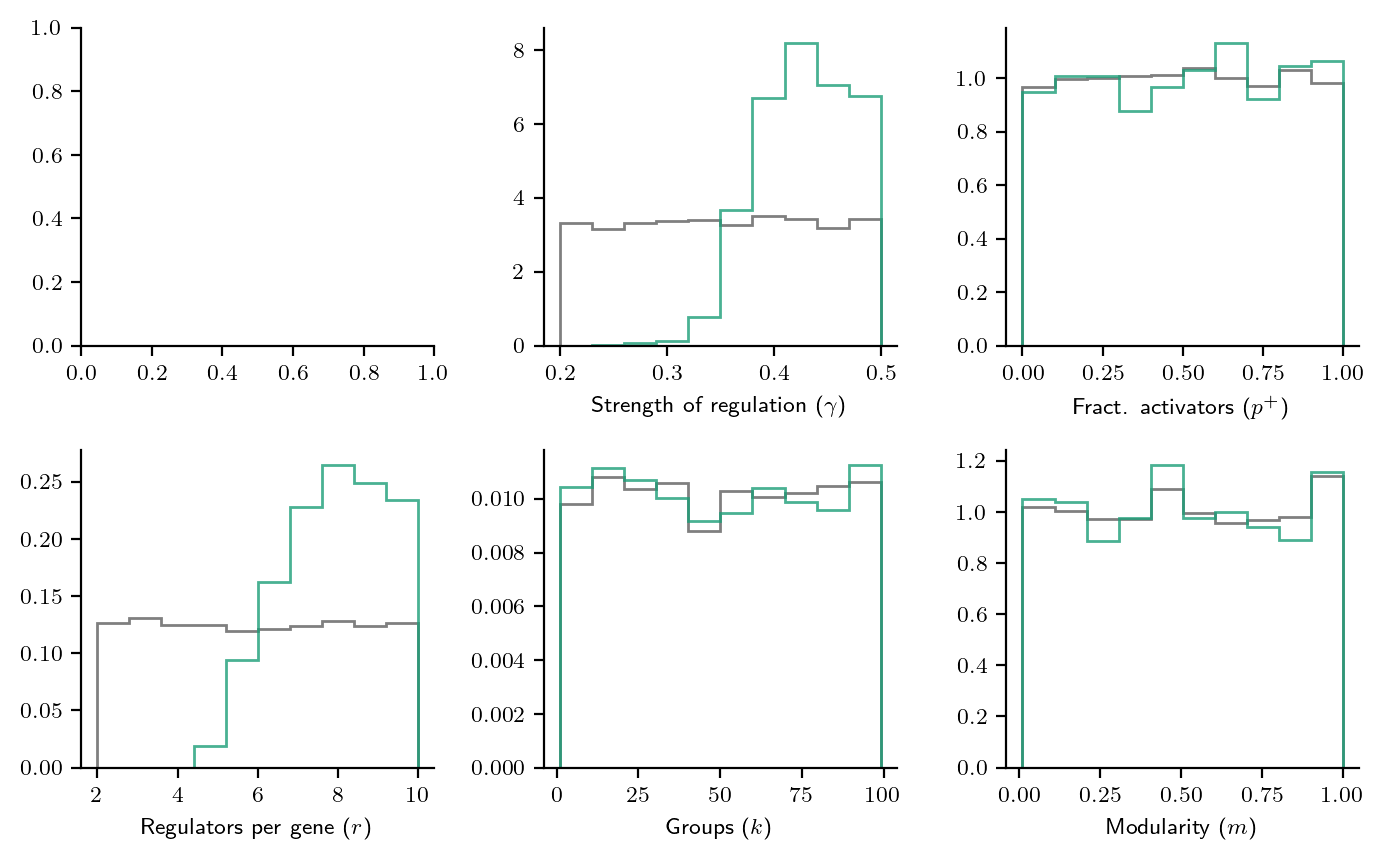

In [29]:
fig, axs = plt.subplots(2, 3, figsize=(7, 4.4), dpi=200)

for (ix, iy), par, label in zip(np.ndindex(axs.shape),
                                ['hier','gamma','p_up','r','k','m'],
                                ['Hierarchical organization (yes/no)',
                                 'Strength of regulation ({})'.format(r'$\gamma$'), 
                                 'Fract. activators ({})'.format(r'$p^+$'),
                                 'Regulators per gene ({})'.format(r'$r$'), 
                                 'Groups ({})'.format(r'$k$'), 
                                 'Modularity ({})'.format(r'$m$'), 
                                 ]):
    if par == 'hier':
        continue
    else:
        _, bins, _ = axs[ix,iy].hist(grns.query('r > 0')[par], histtype='step', density=1, alpha=0.5, color='k');
        _ = axs[ix,iy].hist(grns.query('0.166 < y & y < 0.333')[par], bins=bins, histtype='step', density=1, alpha=0.8);
        
        axs[ix,iy].set_xlabel(label);
        
        
sns.despine();
plt.tight_layout();

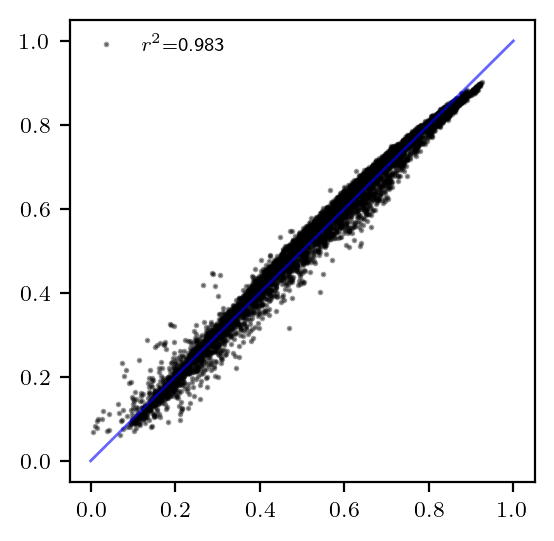

                              OLS Regression Results                              
Dep. Variable:     scipy.special.logit(y)   R-squared:                       0.978
Model:                                OLS   Adj. R-squared:                  0.978
Method:                     Least Squares   F-statistic:                 5.468e+04
Date:                    Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                            13:56:36   Log-Likelihood:                 2455.2
No. Observations:                    5000   AIC:                            -4900.
Df Residuals:                        4995   BIC:                            -4868.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------


In [30]:
plt.figure(figsize=(3,3), dpi=200);

x0 = grns.iloc[range(0,grns.shape[0],2),:]
x1 = grns.iloc[range(1,grns.shape[0],2),:]
model = sm.ols('scipy.special.logit(y) ~ 1 + r*gamma + r:gamma:p_up:m:k', data = x0).fit()
y1hat = scipy.special.expit(model.predict(x1))

plt.plot(x1['y'], y1hat,
         'k.',
         alpha=0.4, ms=2,
         label='{0}={1:.3f}'.format(r'$r^2$', ss.pearsonr(x1['y'], y1hat)[0]**2)
        );
plt.plot([0,1],[0,1],'b-',linewidth=1, alpha=0.6);
plt.legend(frameon=False);
plt.show()

print(model.summary())

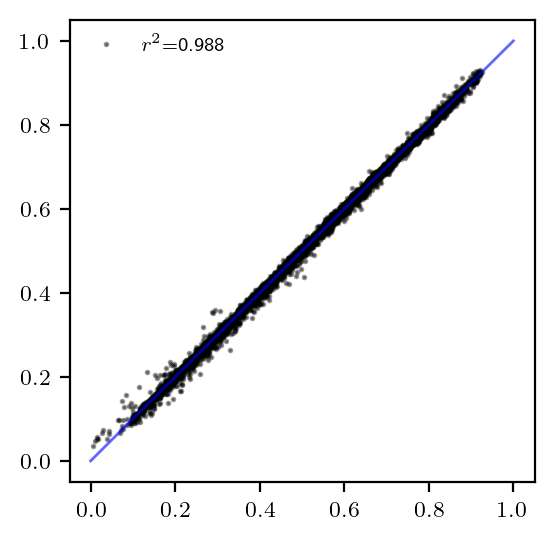

In [31]:
plt.figure(figsize=(3,3), dpi=200);

x0 = grns.iloc[range(0,grns.shape[0],2),:]
x1 = grns.iloc[range(1,grns.shape[0],2),:]
model = sm.ols('scipy.special.logit(y) ~ 1 + (p_up + r + m + k + gamma)**3 + (p_up + r + m + k + gamma)*(I(p_up**2) + I(r**2) + I(m**2) + I(k**2) + I(gamma**2)) + triangles + diamonds', data = x0).fit()
y1hat = model.predict(x1)

plt.plot(x1['y'], scipy.special.expit(y1hat),
         'k.',
         alpha=0.4, ms=2,
         label='{0}={1:.3f}'.format(r'$r^2$', ss.pearsonr(x1['y'], y1hat)[0]**2)
        );
plt.plot([0,1],[0,1],'b-',linewidth=1, alpha=0.6);
plt.legend(frameon=False);

In [32]:
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     scipy.special.logit(y)   R-squared:                       0.997
Model:                                OLS   Adj. R-squared:                  0.997
Method:                     Least Squares   F-statistic:                 2.506e+04
Date:                    Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                            13:56:36   Log-Likelihood:                 7125.5
No. Observations:                    5000   AIC:                        -1.414e+04
Df Residuals:                        4942   BIC:                        -1.376e+04
Df Model:                              57                                         
Covariance Type:                nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [33]:
print(sm.ols('y ~ 1 + p_up + triangles + diamonds + r + m + k', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1375.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:36   Log-Likelihood:                 4357.7
No. Observations:               10000   AIC:                            -8701.
Df Residuals:                    9993   BIC:                            -8651.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9009      0.009    105.471      0.0

In [34]:
print(sm.ols('y ~ 1 + p_up + r + m + k + triangles + diamonds', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1375.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:36   Log-Likelihood:                 4357.7
No. Observations:               10000   AIC:                            -8701.
Df Residuals:                    9993   BIC:                            -8651.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9009      0.009    105.471      0.0

In [35]:
print(sm.ols('y ~ 1 + p_up + r + triangles + diamonds', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     2061.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:37   Log-Likelihood:                 4355.3
No. Observations:               10000   AIC:                            -8701.
Df Residuals:                    9995   BIC:                            -8664.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9155      0.005    174.847      0.0

In [36]:
print(sm.ols('y ~ 1 + p_up + r + m + k', data = grns).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     2058.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:37   Log-Likelihood:                 4351.6
No. Observations:               10000   AIC:                            -8693.
Df Residuals:                    9995   BIC:                            -8657.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9078      0.007    139.185      0.0

## Where are the trans effects?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1375.
Date:                Sat, 02 Aug 2025   Prob (F-statistic):               0.00
Time:                        13:56:42   Log-Likelihood:                 4357.7
No. Observations:               10000   AIC:                            -8701.
Df Residuals:                    9993   BIC:                            -8651.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9009      0.009    105.471      0.0

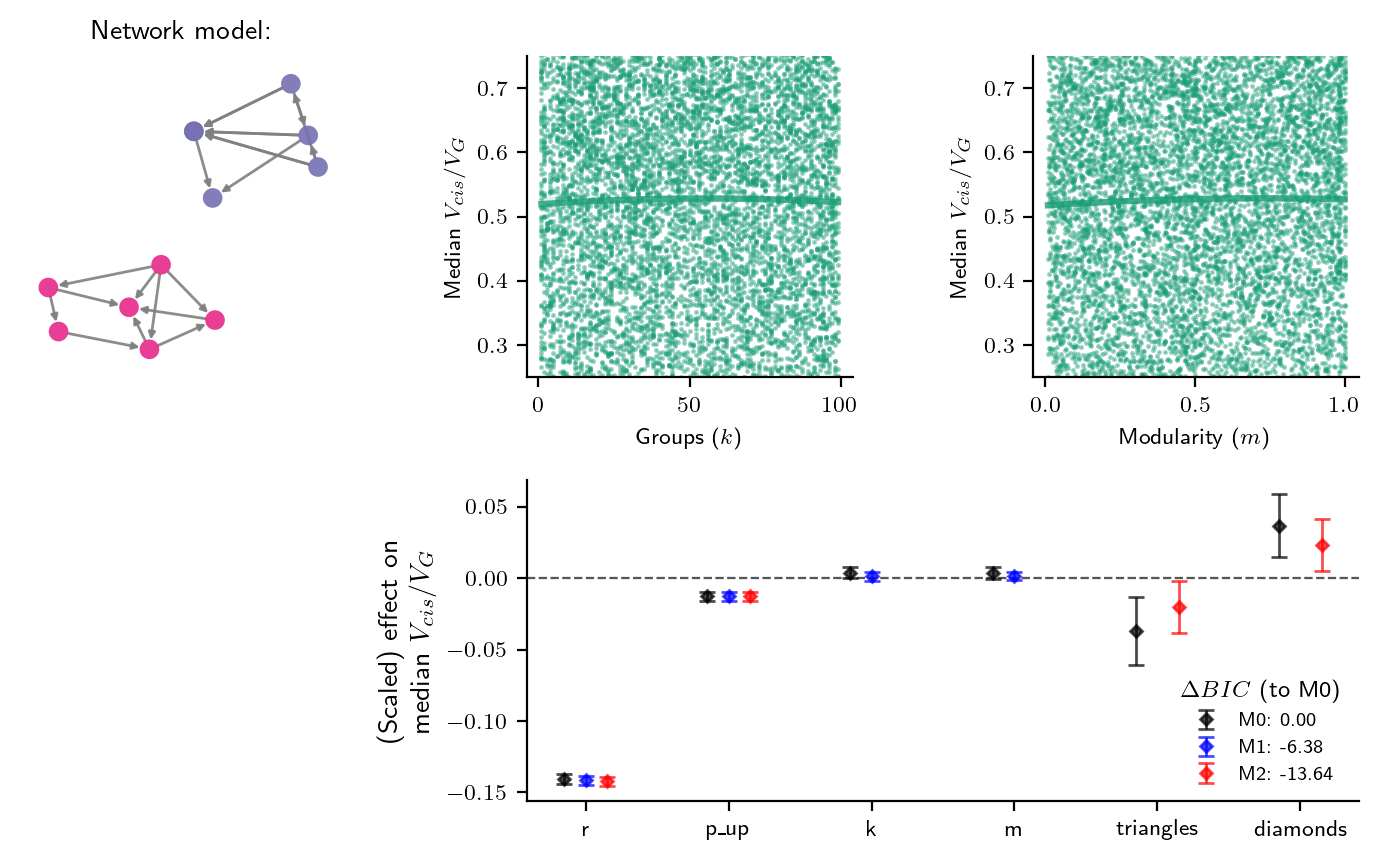

In [37]:
fig, axs = plt.subplots(2, 3, figsize=(7, 4.4), dpi=200)

for (ix, iy), par, label in zip(np.ndindex(axs.shape),
                                ['','k','m'],
                                ['',
                                 'Groups ({})'.format(r'$k$'), 
                                 'Modularity ({})'.format(r'$m$'), 
                                 ]):
    ax = axs[ix, iy]
    if not par: 
        # make a graph
        M = grn().add_structure(method='ppm', n_genes=12, n_groups=2, m=0.95, r=2.5, hierarchy=True)#, seed=650)
        G = nx.DiGraph(M)
        E = [e for e in G.edges() if np.random.random() < 0.66]
        # draw it
        nx.draw_kamada_kawai(G, 
                     node_size=50,
                     node_color=[plt.get_cmap('Dark2')(i+2) for i in M.I],
                     linewidths=0,
                     width=1.0,
                     arrowsize=5,
                     alpha=0.9,
                     edge_color='gray',
                     edgelist=E,
                     ax=ax)
        
        ax.set_title('Network model:', fontsize='medium');
        continue  
    for i, b in enumerate([0]):
        sns.regplot(data = grns, 
                    x = par, 
                    y = 'Median '+r'$V_{cis}/V_{G}$', 
                    color = plt.get_cmap('Dark2')(i),
                    #lowess = True,
                    order = 2 if par != 'gamma' else 1,
                    #x_ci = 'ci',
                    #ci = 99,
                    scatter = True,
                    line_kws = dict(alpha=0.8, label=('No ' if not b else '')+'Hierarchy'),
                    scatter_kws = dict(s=0.7, alpha=0.4, label=None),
                    ax = ax
                   )
    ax.set_ylim(0.25, 0.75);
    ax.set_xlabel(label);
    #if ix == 0 and iy == 0:
    #    ax.legend(fontsize=7.5, frameon=False, loc='upper right');
    
    
gs = axs[1, 1].get_gridspec()
# remove the underlying Axes
for ax in axs[1, :]:
    ax.remove()
ax = fig.add_subplot(gs[1, 1:])

ics = []
for i,terms in enumerate([('k','m','triangles','diamonds'), ('k','m'), ('triangles','diamonds')]):
    
    model = sm.ols('y ~ 1 + p_up + r +' + '+'.join(terms), data = grns).fit()
    ics.append(model.bic)
    
    odds = model.conf_int().rename(columns={0:'2.5%', 1:'97.5%'})
    odds['Coefficient'] = model.params
    odds = odds.drop('Intercept')#.rename(index={'r':'TFs/gene'})
    ci = odds['97.5%'] - odds['Coefficient']
    print(model.summary())
    
    sd = grns.loc[:,odds.index].std()
    
    names = ['r','p_up','k','m','triangles','diamonds']    
    xloc = np.array([names.index(w) for w in odds.index])
    c = ['black', 'blue', 'red'][i]
    ax.errorbar(y=odds['Coefficient'].values * sd, 
                x=xloc + 0.15*i, 
                yerr=ci * sd,
                color=c, capsize=3, linestyle='None', linewidth=1, alpha=0.7,
                marker="D", markersize=3, mfc=c, mec=c,
                label='M{0}: {1:.2f}'.format(i, ics[i] - ics[0])
               )

    ax.axhline(y=0, linewidth=0.8, alpha=0.3, linestyle='--', color='black')
    if i == 0:
        ax.set_xticks(np.arange(len(names)) + 0.15, names);
    #ax.set_yscale('symlog');
    #ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_ylabel('(Scaled) effect on\nmedian '+r'$V_{cis}/V_{G}$', fontsize=10)
    
ax.legend(fontsize='x-small', title=r'$\Delta BIC$' + ' (to M0)', title_fontsize='small', frameon=False);

# overall figure stuff
sns.despine();
fig.tight_layout();

In [38]:
grns['Median ' + r'$max(B_{trans}^2/V_{G})$'] = grns[r'$max(B_{trans}^2/V_{cis})$'].apply(lambda x: np.median(x))
grns['Mean ' + r'$max(B_{trans}^2/V_{G})$'] = grns[r'$max(B_{trans}^2/V_{cis})$'].apply(lambda x: np.mean(x))
grns['Median ' + r'$max(B_{trans}^2/V_{cis})$'] = (
    grns[r'$max(B_{trans}^2/V_{cis})$'] / grns[r'$V_{cis}/V_{G}$']).apply(lambda x: np.median(x)).clip(upper=1)
grns['30Q ' + r'$max(B_{trans}^2/V_{cis})$'] = (
    grns[r'$max(B_{trans}^2/V_{cis})$'] / grns[r'$V_{cis}/V_{G}$']).apply(lambda x: np.quantile(x, 0.3)).clip(upper=1)
grns['Mean ' + r'$max(B_{trans}^2/V_{cis})$'] = (
    grns[r'$max(B_{trans}^2/V_{cis})$'] / grns[r'$V_{cis}/V_{G}$']).apply(lambda x: np.mean(x)).clip(upper=1)

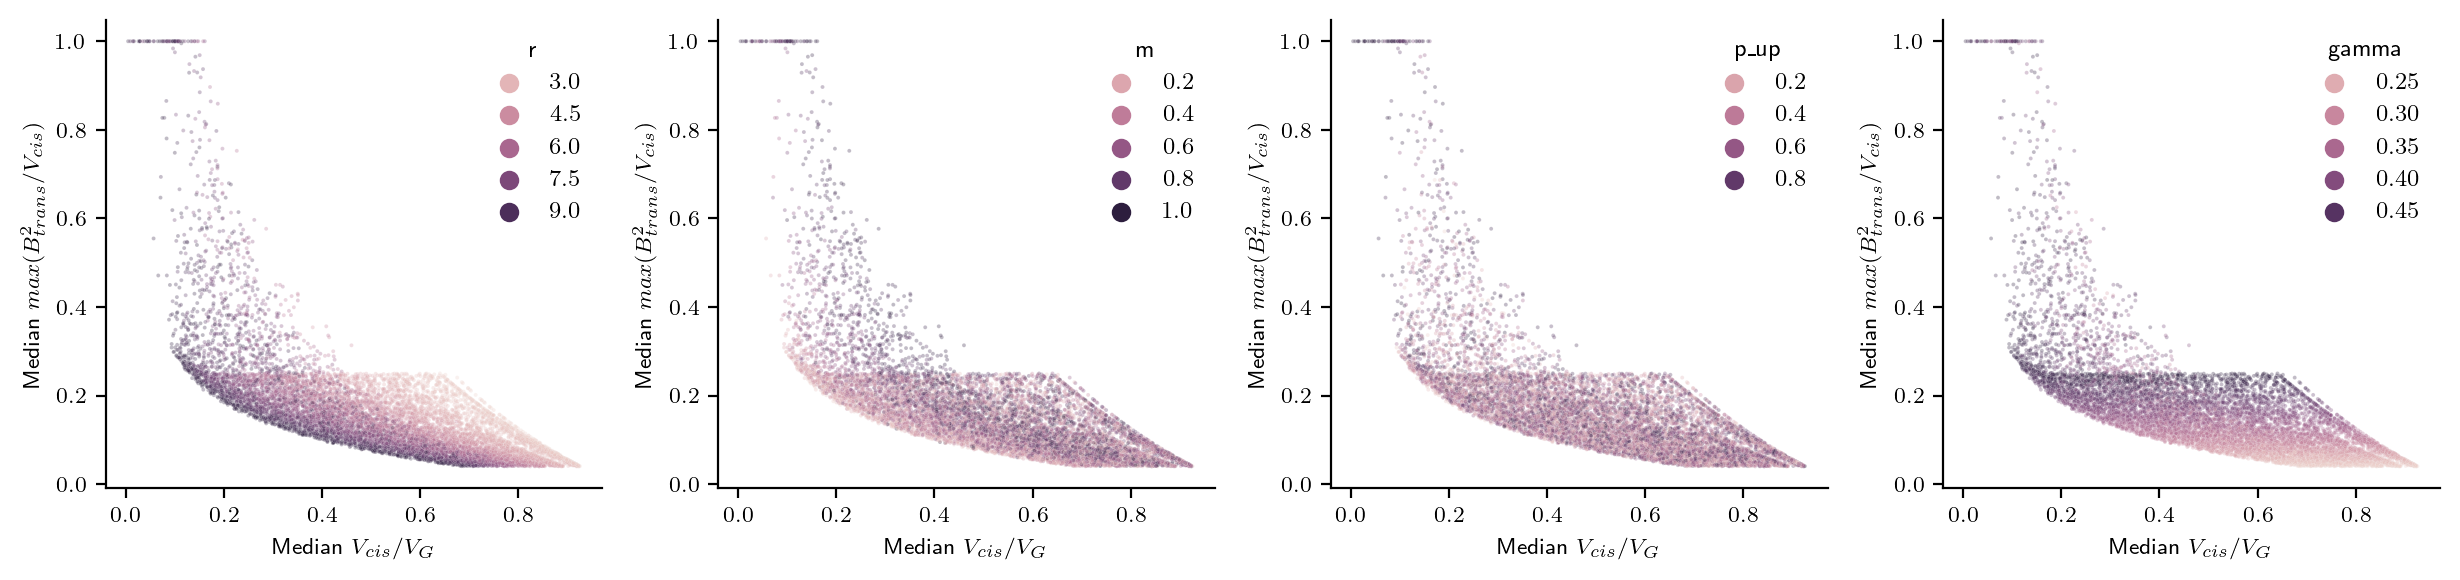

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(12.4, 3), dpi=200)

for i, stat in enumerate(['r', 'm', 'p_up', 'gamma']):
    sns.scatterplot(data = grns.query('~hier'),
                    x = 'Median $V_{cis}/V_{G}$',
                    y = 'Median ' + r'$max(B_{trans}^2/V_{cis})$',
                    hue = stat, 
                    s=2, 
                    alpha=0.3,
                    ax = ax[i])
    ax[i].legend(fontsize='small', title=stat, title_fontsize='small', frameon=False);

fig.tight_layout();
sns.despine()

In [40]:
grns['logw'] = np.log(grns['w'])

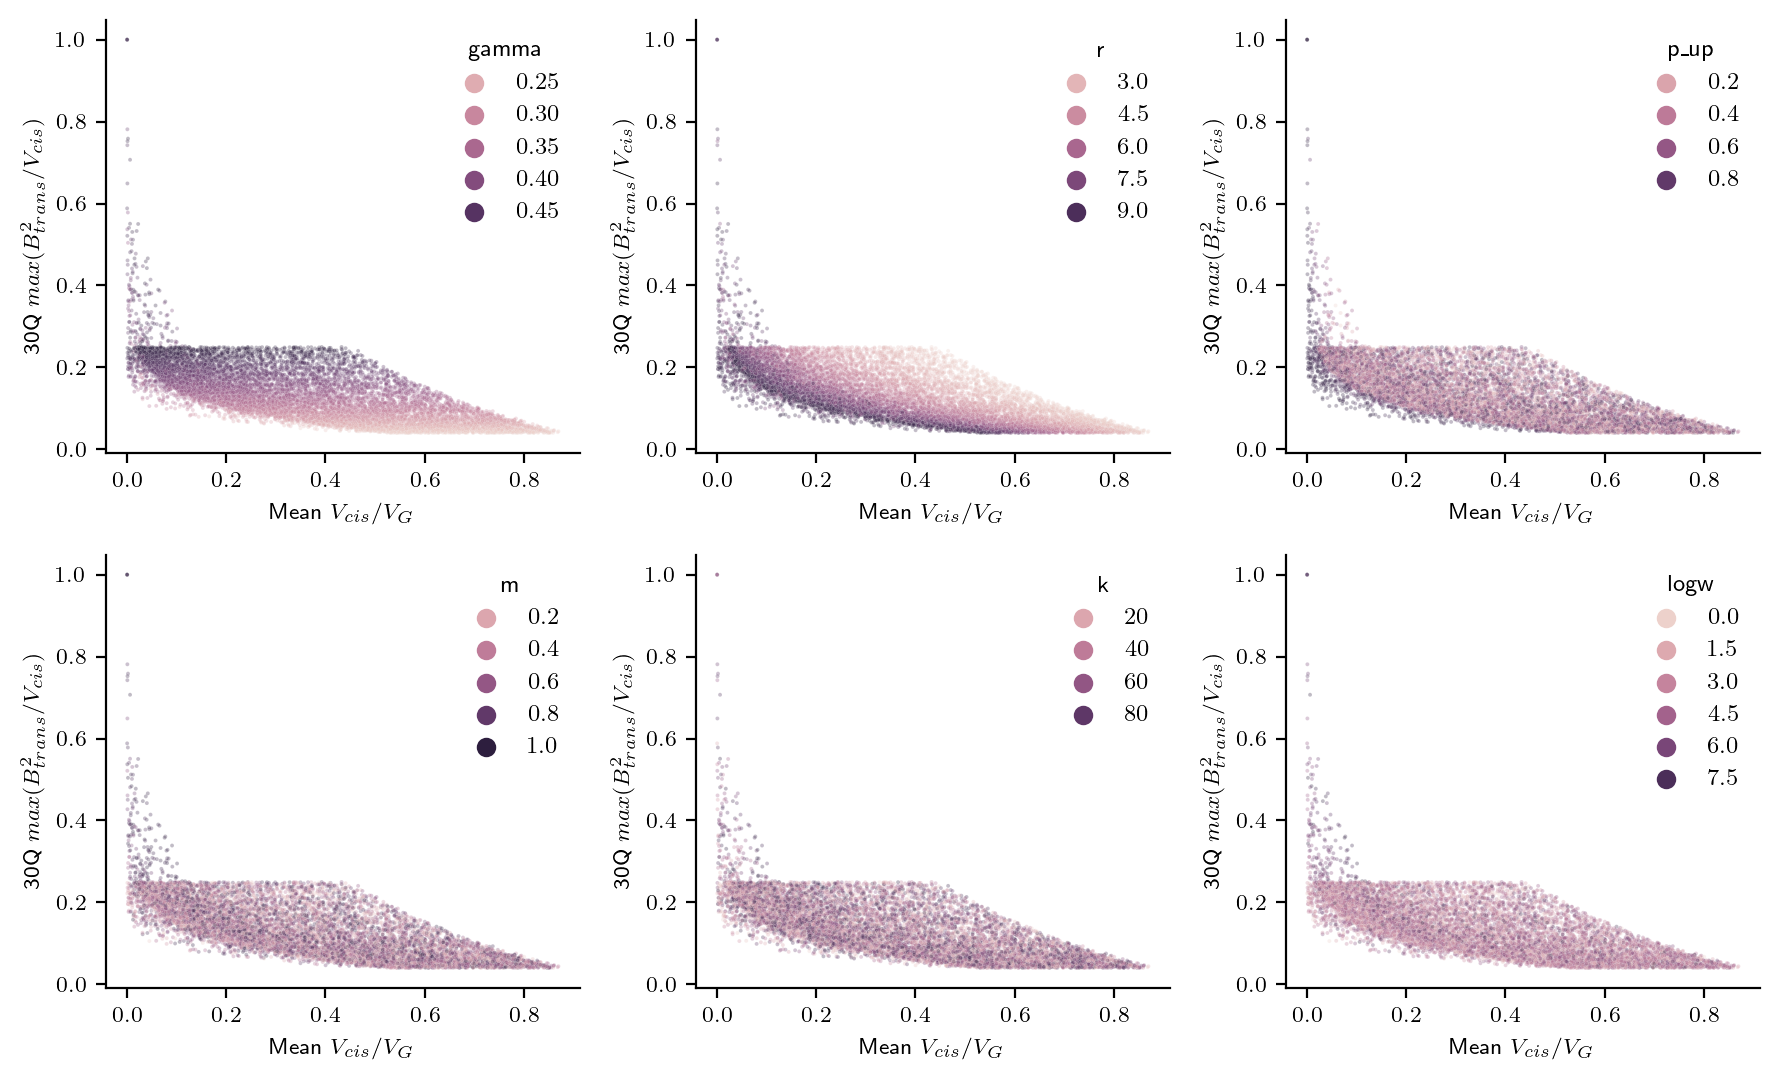

In [41]:
fig, ax = plt.subplots(2, 3, figsize=(9, 5.5), dpi=200)

for (i,j), stat in zip([(i,j) for i in range(ax.shape[0]) for j in range(ax.shape[1])],
                       ['gamma', 'r', 'p_up', 'm', 'k', 'logw']):
    if not stat:
        ax[i,j].remove();
        continue
    sns.scatterplot(data = grns.query('~hier'),
                    x = 'Mean $V_{cis}/V_{G}$',
                    y = '30Q ' + r'$max(B_{trans}^2/V_{cis})$',
                    hue = stat, 
                    s=2, 
                    alpha=0.3,
                    ax = ax[i,j])
    ax[i,j].legend(fontsize='small', title=stat, title_fontsize='small', frameon=False);

fig.tight_layout();
sns.despine()